In [1]:
# Ch5 plot_helpers.py

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap


cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

# create a smooth transition from the first to to the second color of cm3
# similar to RdBu but with our red and blue, also not going through white,
# which is really bad for greyscale

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)


def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

In [2]:
#Ch5 - Preamble
from IPython.display import set_matplotlib_formats, display
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color',cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [3]:
#from preamble import *
#%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
#Ch3 - plot_cross_validation
#import numpy as np
#import matplotlib.pyplot as plt

def plot_group_kfold():
    from sklearn.model_selection import GroupKFold
    groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

    plt.figure(figsize=(10, 2))
    plt.title("GroupKFold")

    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 12
    n_samples = 12
    n_iter = 3
    n_samples_per_fold = 1

    cv = GroupKFold(n_splits=3)
    mask = np.zeros((n_iter, n_samples))
    for i, (train, test) in enumerate(cv.split(range(12), groups=groups)):
        mask[i, train] = 1
        mask[i, test] = 2

    for i in range(n_folds):
        # test is grey
        colors = ["grey" if x == 2 else "white" for x in mask[:, i]]
        # not selected has no hatch

        boxes = axes.barh(y=range(n_iter), width=[1 - 0.1] * n_iter,
                          left=i * n_samples_per_fold, height=.6, color=colors,
                          hatch="//", edgecolor="k", align='edge')
        for j in np.where(mask[:, i] == 0)[0]:
            boxes[j].set_hatch("")

    axes.barh(y=[n_iter] * n_folds, width=[1 - 0.1] * n_folds,
              left=np.arange(n_folds) * n_samples_per_fold, height=.6,
              color="w", edgecolor='k', align="edge")

    for i in range(12):
        axes.text((i + .5) * n_samples_per_fold, 3.5, "%d" %
                  groups[i], horizontalalignment="center")

    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("CV iterations")
    axes.set_xlabel("Data points")
    axes.set_xticks(np.arange(n_samples) + .5)
    axes.set_xticklabels(np.arange(1, n_samples + 1))
    axes.set_yticks(np.arange(n_iter + 1) + .3)
    axes.set_yticklabels(
        ["Split %d" % x for x in range(1, n_iter + 1)] + ["Group"])
    plt.legend([boxes[0], boxes[1]], ["Training set", "Test set"], loc=(1, .3))
    plt.tight_layout()


def plot_shuffle_split():
    from sklearn.model_selection import ShuffleSplit
    plt.figure(figsize=(10, 2))
    plt.title("ShuffleSplit with 10 points"
              ", train_size=5, test_size=2, n_splits=4")

    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 10
    n_samples = 10
    n_iter = 4
    n_samples_per_fold = 1

    ss = ShuffleSplit(n_splits=4, train_size=5, test_size=2, random_state=43)
    mask = np.zeros((n_iter, n_samples))
    for i, (train, test) in enumerate(ss.split(range(10))):
        mask[i, train] = 1
        mask[i, test] = 2

    for i in range(n_folds):
        # test is grey
        colors = ["grey" if x == 2 else "white" for x in mask[:, i]]
        # not selected has no hatch

        boxes = axes.barh(y=range(n_iter), width=[1 - 0.1] * n_iter,
                          left=i * n_samples_per_fold, height=.6, color=colors,
                          hatch="//", edgecolor='k', align='edge')
        for j in np.where(mask[:, i] == 0)[0]:
            boxes[j].set_hatch("")

    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("CV iterations")
    axes.set_xlabel("Data points")
    axes.set_xticks(np.arange(n_samples) + .5)
    axes.set_xticklabels(np.arange(1, n_samples + 1))
    axes.set_yticks(np.arange(n_iter) + .3)
    axes.set_yticklabels(["Split %d" % x for x in range(1, n_iter + 1)])
    # legend hacked for this random state
    plt.legend([boxes[1], boxes[0], boxes[2]], [
               "Training set", "Test set", "Not selected"], loc=(1, .3))
    plt.tight_layout()


def plot_stratified_cross_validation():
    fig, both_axes = plt.subplots(2, 1, figsize=(12, 5))
    # plt.title("cross_validation_not_stratified")
    axes = both_axes[0]
    axes.set_title("Standard cross-validation with sorted class labels")

    axes.set_frame_on(False)

    n_folds = 3
    n_samples = 150

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        axes.barh(y=range(n_folds), width=[n_samples_per_fold - 1] *
                  n_folds, left=i * n_samples_per_fold, height=.6,
                  color=colors, hatch="//", edgecolor='k', align='edge')

    axes.barh(y=[n_folds] * n_folds, width=[n_samples_per_fold - 1] *
              n_folds, left=np.arange(3) * n_samples_per_fold, height=.6,
              color="w", edgecolor='k', align='edge')

    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("CV iterations")
    axes.set_xlabel("Data points")
    axes.set_xticks(np.arange(n_samples_per_fold / 2.,
                              n_samples, n_samples_per_fold))
    axes.set_xticklabels(["Fold %d" % x for x in range(1, n_folds + 1)])
    axes.set_yticks(np.arange(n_folds + 1) + .3)
    axes.set_yticklabels(
        ["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])
    for i in range(3):
        axes.text((i + .5) * n_samples_per_fold, 3.5, "Class %d" %
                  i, horizontalalignment="center")

    ax = both_axes[1]
    ax.set_title("Stratified Cross-validation")
    ax.set_frame_on(False)
    ax.invert_yaxis()
    ax.set_xlim(0, n_samples + 1)
    ax.set_ylabel("CV iterations")
    ax.set_xlabel("Data points")

    ax.set_yticks(np.arange(n_folds + 1) + .3)
    ax.set_yticklabels(
        ["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])

    n_subsplit = n_samples_per_fold / 3.
    for i in range(n_folds):
        test_bars = ax.barh(
            y=[i] * n_folds, width=[n_subsplit - 1] * n_folds,
            left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
            height=.6, color="grey", hatch="//", edgecolor='k', align='edge')

    w = 2 * n_subsplit - 1
    ax.barh(y=[0] * n_folds, width=[w] * n_folds, left=np.arange(n_folds)
            * n_samples_per_fold + (0 + 1) * n_subsplit, height=.6, color="w",
            hatch="//", edgecolor='k', align='edge')
    ax.barh(y=[1] * (n_folds + 1), width=[w / 2., w, w, w / 2.],
            left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold -
                            n_subsplit), height=.6, color="w", hatch="//",
            edgecolor='k', align='edge')
    training_bars = ax.barh(y=[2] * n_folds, width=[w] * n_folds,
                            left=np.arange(n_folds) * n_samples_per_fold,
                            height=.6, color="w", hatch="//", edgecolor='k',
                            align='edge')

    ax.barh(y=[n_folds] * n_folds, width=[n_samples_per_fold - 1] *
            n_folds, left=np.arange(n_folds) * n_samples_per_fold, height=.6,
            color="w", edgecolor='k', align='edge')

    for i in range(3):
        ax.text((i + .5) * n_samples_per_fold, 3.5, "Class %d" %
                i, horizontalalignment="center")
    ax.set_ylim(4, -0.1)
    plt.legend([training_bars[0], test_bars[0]], [
               'Training data', 'Test data'], loc=(1.05, 1), frameon=False)

    fig.tight_layout()


def plot_cross_validation():
    plt.figure(figsize=(12, 2))
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 5
    n_samples = 25

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[4]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)


def plot_threefold_split():
    plt.figure(figsize=(15, 1))
    axis = plt.gca()
    bars = axis.barh([0, 0, 0], [11.9, 2.9, 4.9], left=[0, 12, 15], color=[
                     'white', 'grey', 'grey'], hatch="//", edgecolor='k',
                     align='edge')
    bars[2].set_hatch(r"")
    axis.set_yticks(())
    axis.set_frame_on(False)
    axis.set_ylim(-.1, .8)
    axis.set_xlim(-0.1, 20.1)
    axis.set_xticks([6, 13.3, 17.5])
    axis.set_xticklabels(["training set", "validation set",
                          "test set"], fontdict={'fontsize': 20})
    axis.tick_params(length=0, labeltop=True, labelbottom=False)
    axis.text(6, -.3, "Model fitting",
              fontdict={'fontsize': 13}, horizontalalignment="center")
    axis.text(13.3, -.3, "Parameter selection",
              fontdict={'fontsize': 13}, horizontalalignment="center")
    axis.text(17.5, -.3, "Evaluation",
              fontdict={'fontsize': 13}, horizontalalignment="center")

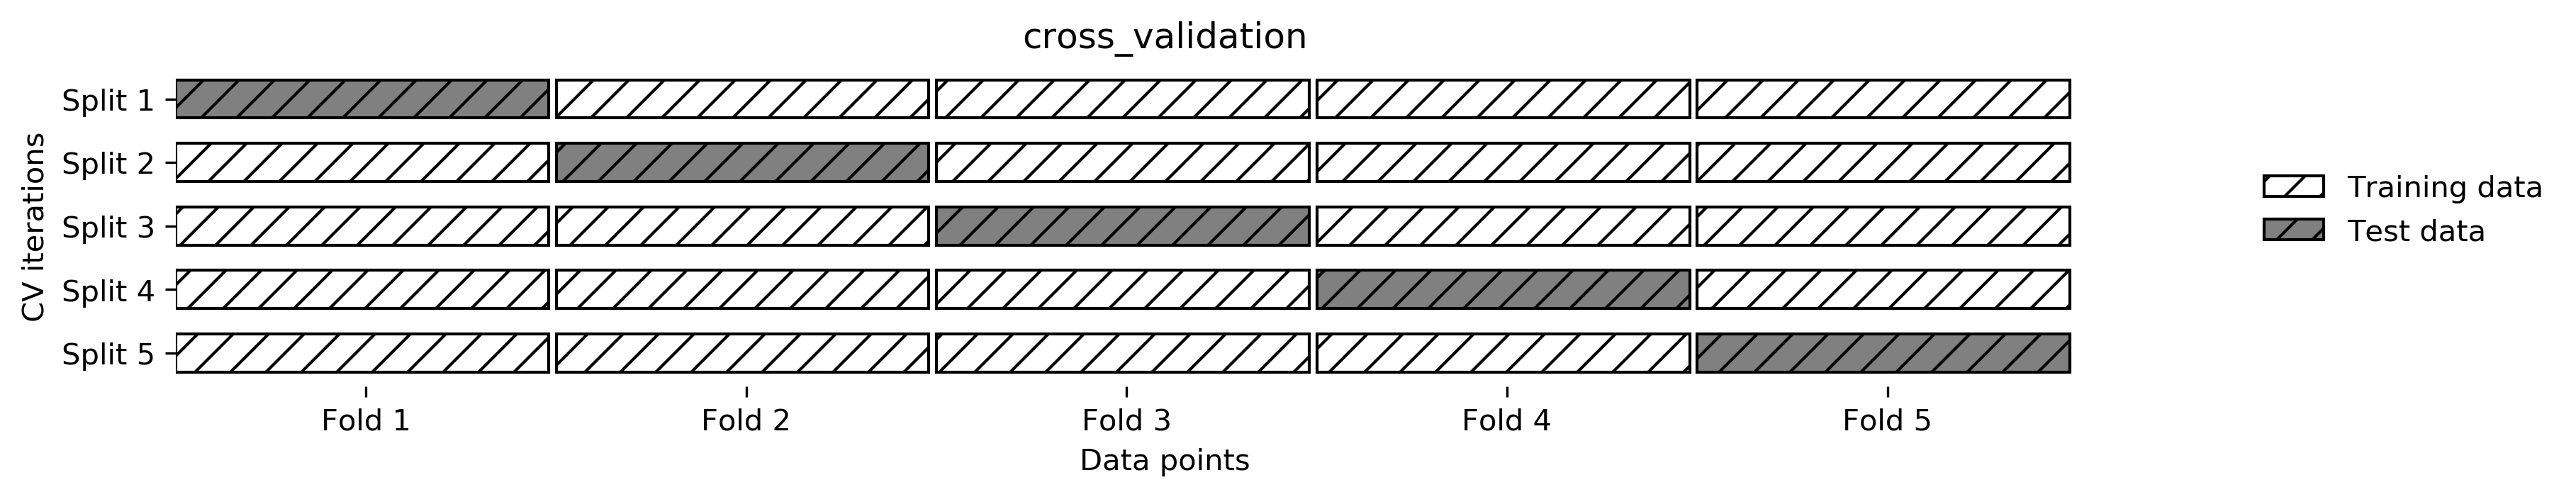

In [6]:
plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.961 0.922 0.958]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/lin

In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.    0.967 0.933 0.9   1.   ]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [9]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

{'fit_time': array([0.002, 0.002, 0.001, 0.002, 0.001]),
 'score_time': array([0.001, 0.   , 0.001, 0.   , 0.   ]),
 'test_score': array([1.   , 0.967, 0.933, 0.9  , 1.   ]),
 'train_score': array([0.95 , 0.967, 0.967, 0.975, 0.958])}

In [11]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,1.81e-03,5.15e-04,1.00,0.95
1,1.88e-03,4.05e-04,0.97,0.97
2,1.33e-03,5.33e-04,0.93,0.97
3,2.01e-03,3.31e-04,0.90,0.97
4,1.47e-03,3.06e-04,1.00,0.96


Mean times and scores:
 fit_time       1.70e-03
score_time     4.18e-04
test_score     9.60e-01
train_score    9.63e-01
dtype: float64


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


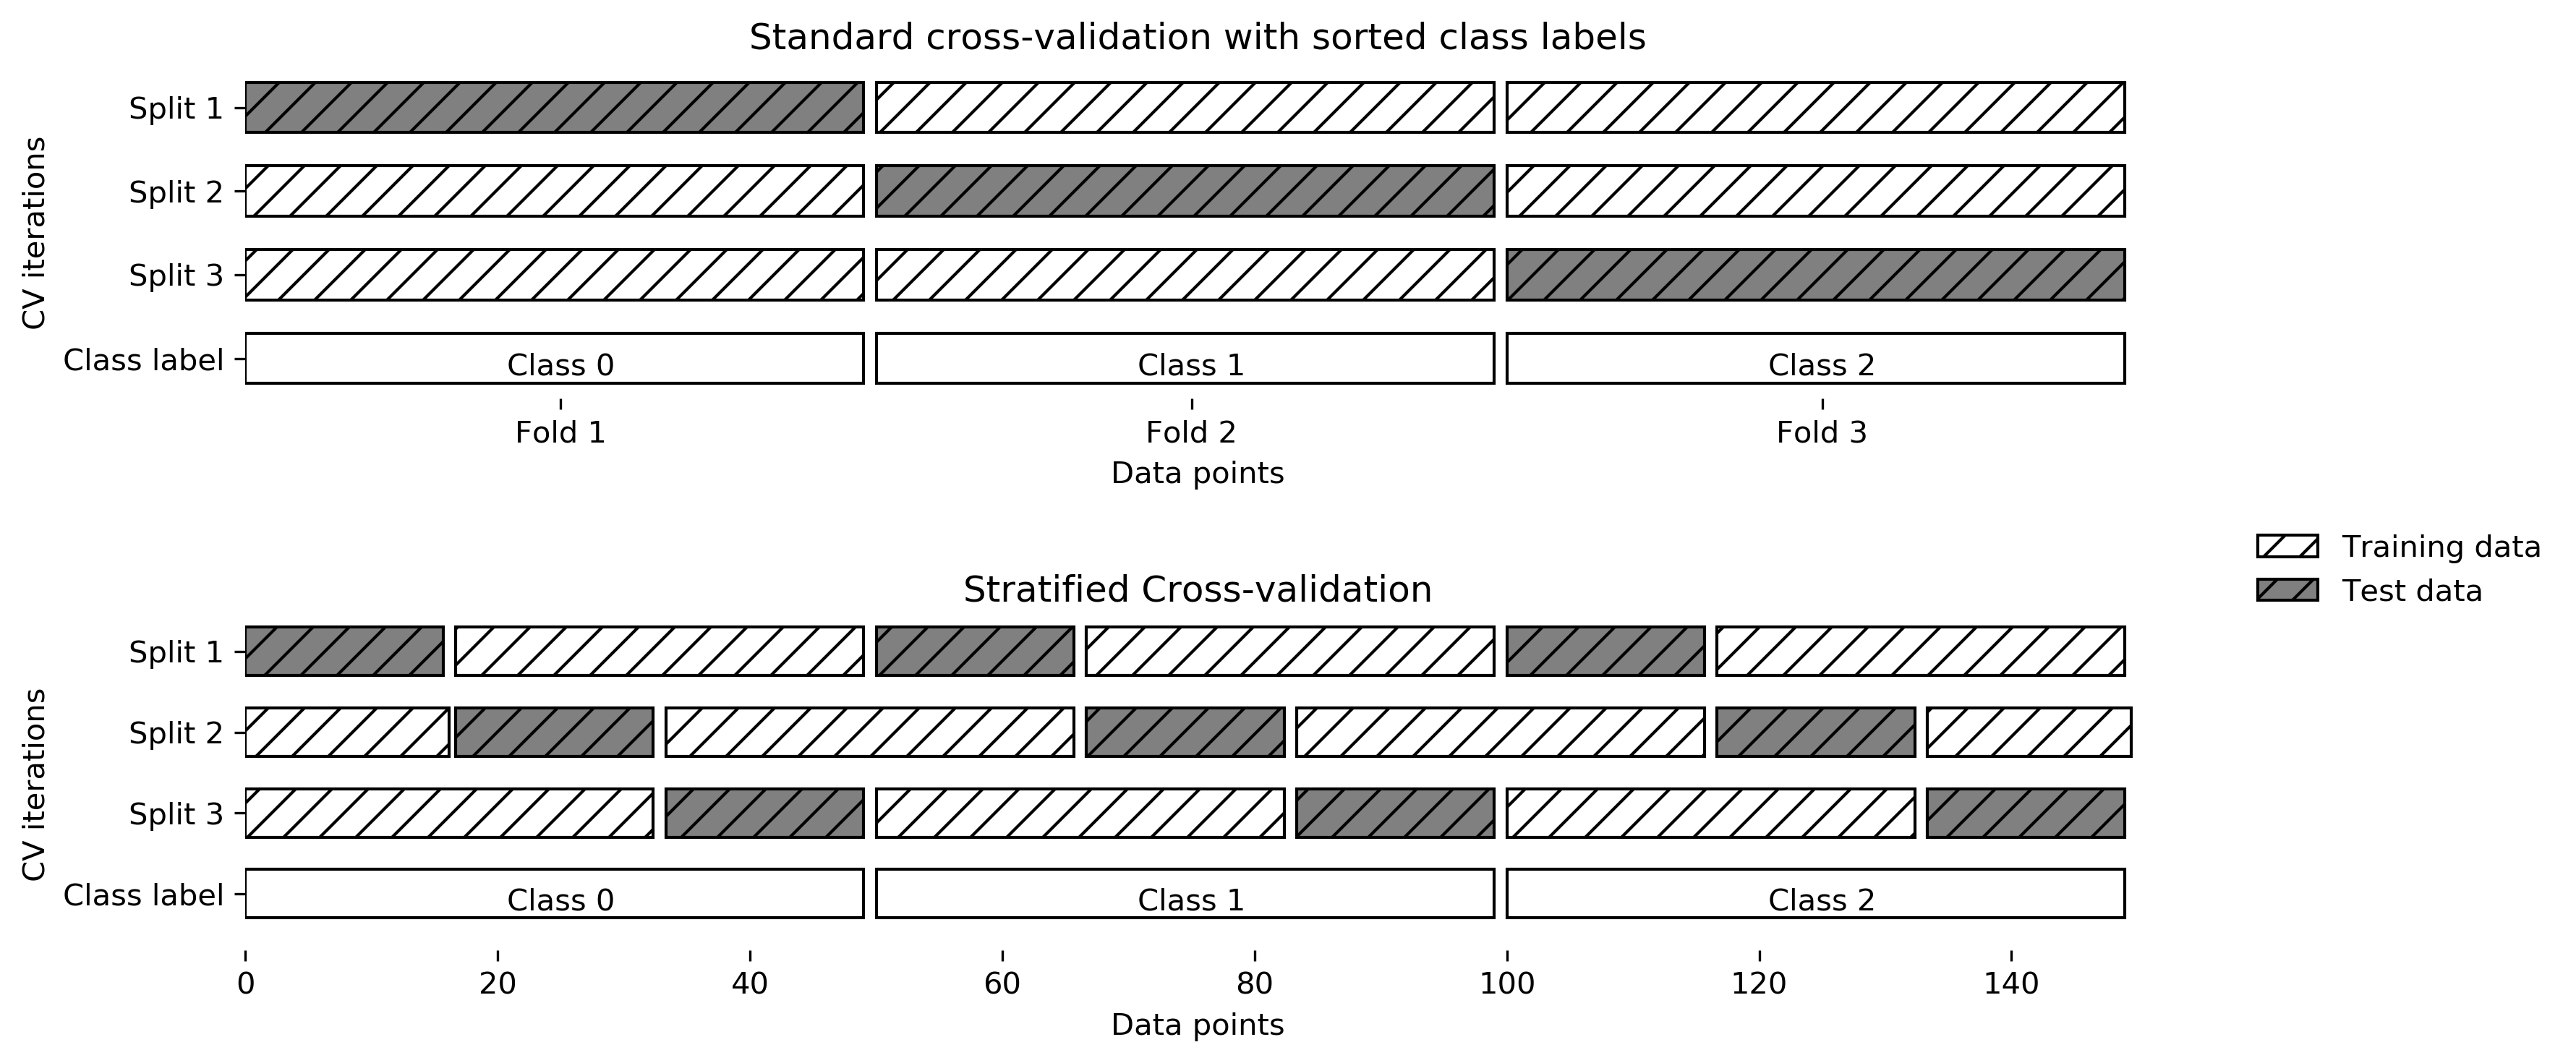

In [13]:
plot_stratified_cross_validation()

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [15]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    0.933 0.433 0.967 0.433]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [16]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

Number of cv iterations:  150
Mean accuracy: 0.95


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

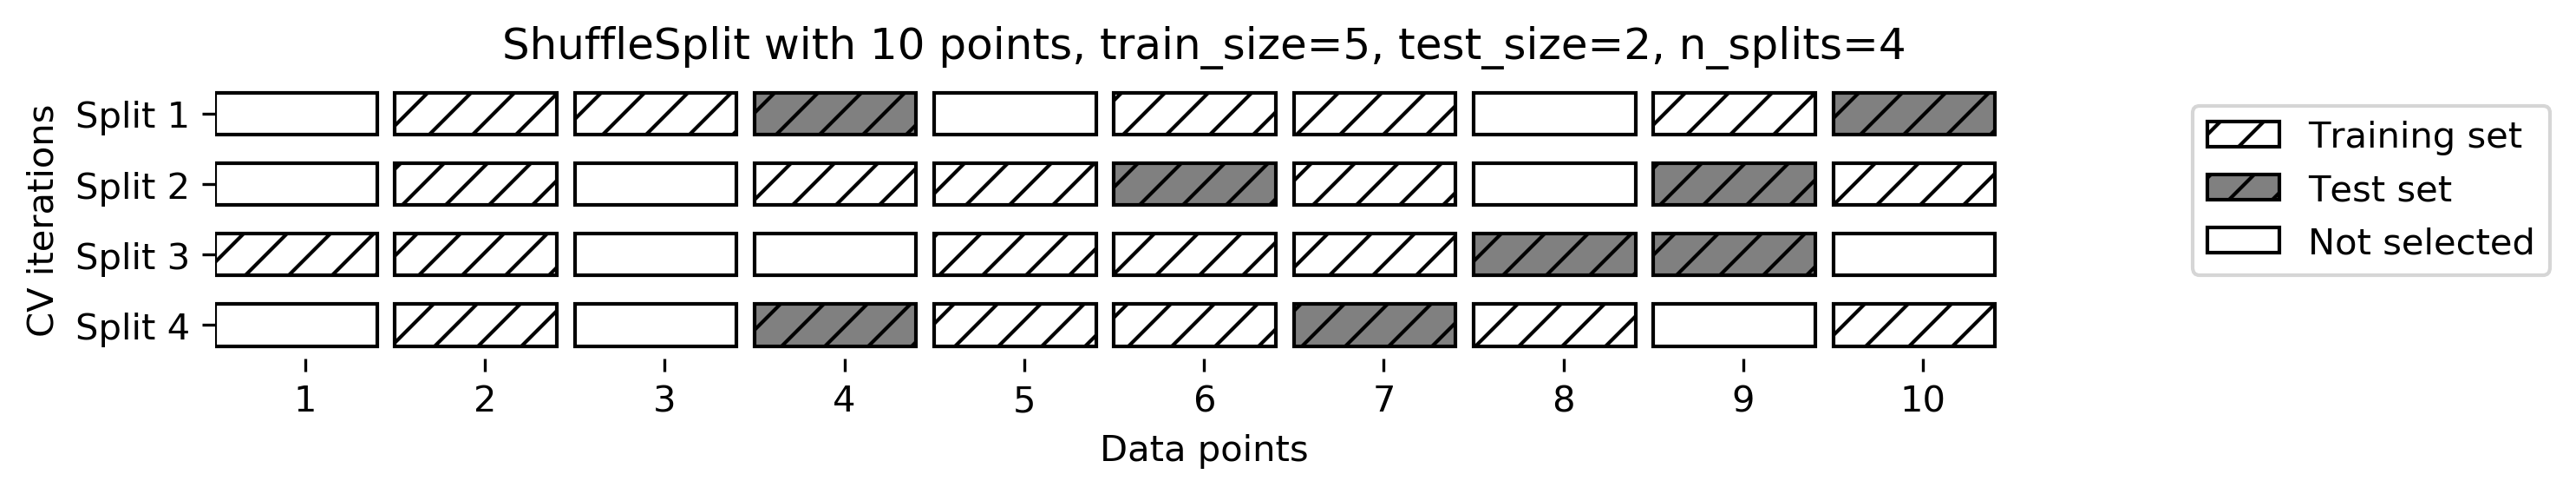

In [19]:
plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96  0.973 0.947 0.907 0.973 0.92  0.947 0.88  0.907 0.947]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

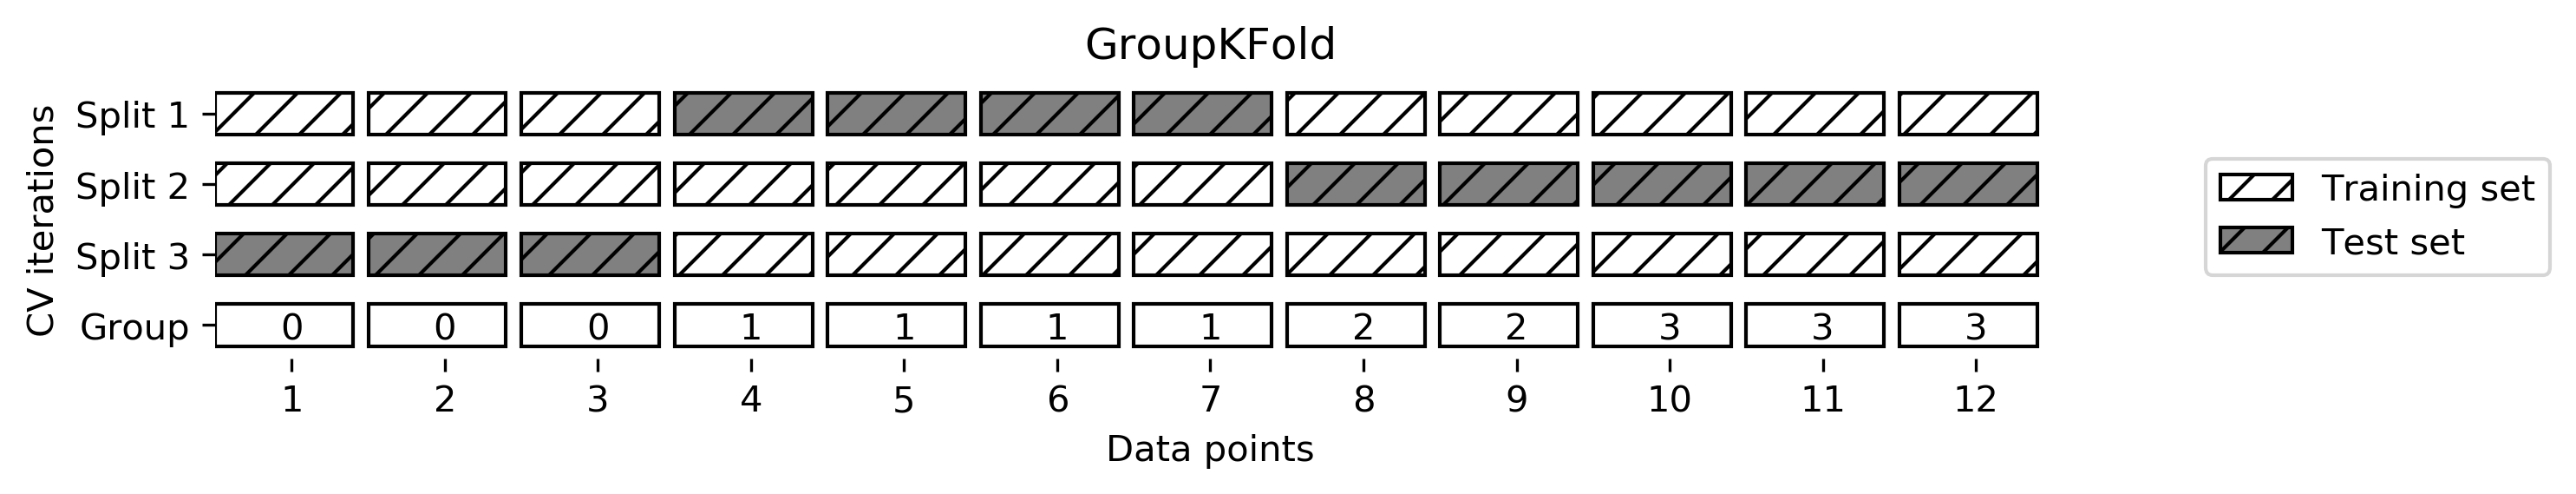

In [21]:
plot_group_kfold()

In [22]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.8   0.667]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [23]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


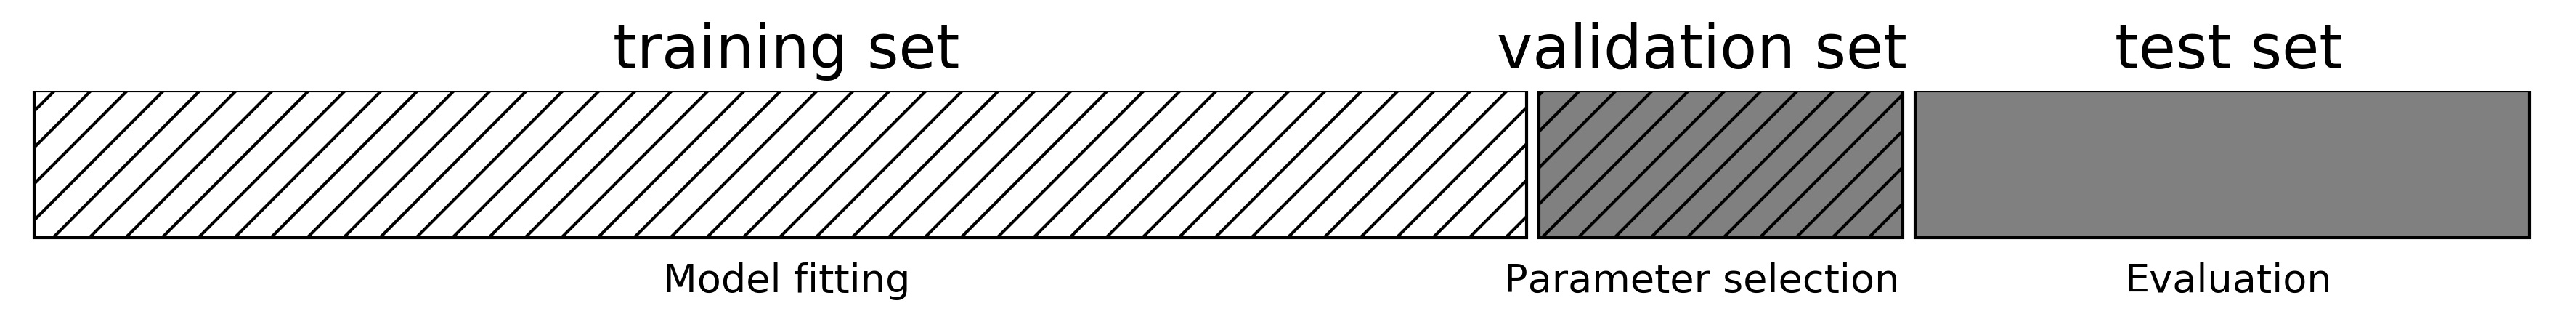

In [24]:
plot_threefold_split()

In [25]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [26]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
#Ch5 plot-grid_search
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
#import pandas as pd


def plot_cross_val_selection():
    iris = load_iris()
    X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                              iris.target,
                                                              random_state=0)

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                               return_train_score=True)
    grid_search.fit(X_trainval, y_trainval)
    results = pd.DataFrame(grid_search.cv_results_)[15:]

    best = np.argmax(results.mean_test_score.values)
    plt.figure(figsize=(10, 3))
    plt.xlim(-1, len(results))
    plt.ylim(0, 1.1)
    for i, (_, row) in enumerate(results.iterrows()):
        scores = row[['split%d_test_score' % i for i in range(5)]]
        marker_cv, = plt.plot([i] * 5, scores, '^', c='gray', markersize=5,
                              alpha=.5)
        marker_mean, = plt.plot(i, row.mean_test_score, 'v', c='none', alpha=1,
                                markersize=10, markeredgecolor='k')
        if i == best:
            marker_best, = plt.plot(i, row.mean_test_score, 'o', c='red',
                                    fillstyle="none", alpha=1, markersize=20,
                                    markeredgewidth=3)

    plt.xticks(range(len(results)), [str(x).strip("{}").replace("'", "") for x
                                     in grid_search.cv_results_['params']],
               rotation=90)
    plt.ylabel("Validation accuracy")
    plt.xlabel("Parameter settings")
    plt.legend([marker_cv, marker_mean, marker_best],
               ["cv accuracy", "mean accuracy", "best parameter setting"],
               loc=(1.05, .4))


def plot_grid_search_overview():
    plt.figure(figsize=(10, 3), dpi=70)
    axes = plt.gca()
    axes.yaxis.set_visible(False)
    axes.xaxis.set_visible(False)
    axes.set_frame_on(False)

    def draw(ax, text, start, target=None):
        if target is not None:
            patchB = target.get_bbox_patch()
            end = target.get_position()
        else:
            end = start
            patchB = None
        annotation = ax.annotate(text, end, start, xycoords='axes pixels',
                                 textcoords='axes pixels', size=20,
                                 arrowprops=dict(
                                     arrowstyle="-|>", fc="w", ec="k",
                                     patchB=patchB,
                                     connectionstyle="arc3,rad=0.0"),
                                 bbox=dict(boxstyle="round", fc="w"),
                                 horizontalalignment="center",
                                 verticalalignment="center")
        plt.draw()
        return annotation

    step = 100
    grr = 400

    final_evaluation = draw(axes, "final evaluation", (5 * step, grr - 3 *
                                                       step))
    retrained_model = draw(axes, "retrained model", (3 * step, grr - 3 * step),
                           final_evaluation)
    best_parameters = draw(axes, "best parameters", (.5 * step, grr - 3 *
                                                     step), retrained_model)
    cross_validation = draw(axes, "cross-validation", (.5 * step, grr - 2 *
                                                       step), best_parameters)
    draw(axes, "parameter grid", (0.0, grr - 0), cross_validation)
    training_data = draw(axes, "training data", (2 * step, grr - step),
                         cross_validation)
    draw(axes, "training data", (2 * step, grr - step), retrained_model)
    test_data = draw(axes, "test data", (5 * step, grr - step),
                     final_evaluation)
    draw(axes, "data set", (3.5 * step, grr - 0.0), training_data)
    draw(axes, "data set", (3.5 * step, grr - 0.0), test_data)
    plt.ylim(0, 1)
    plt.xlim(0, 1.5)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


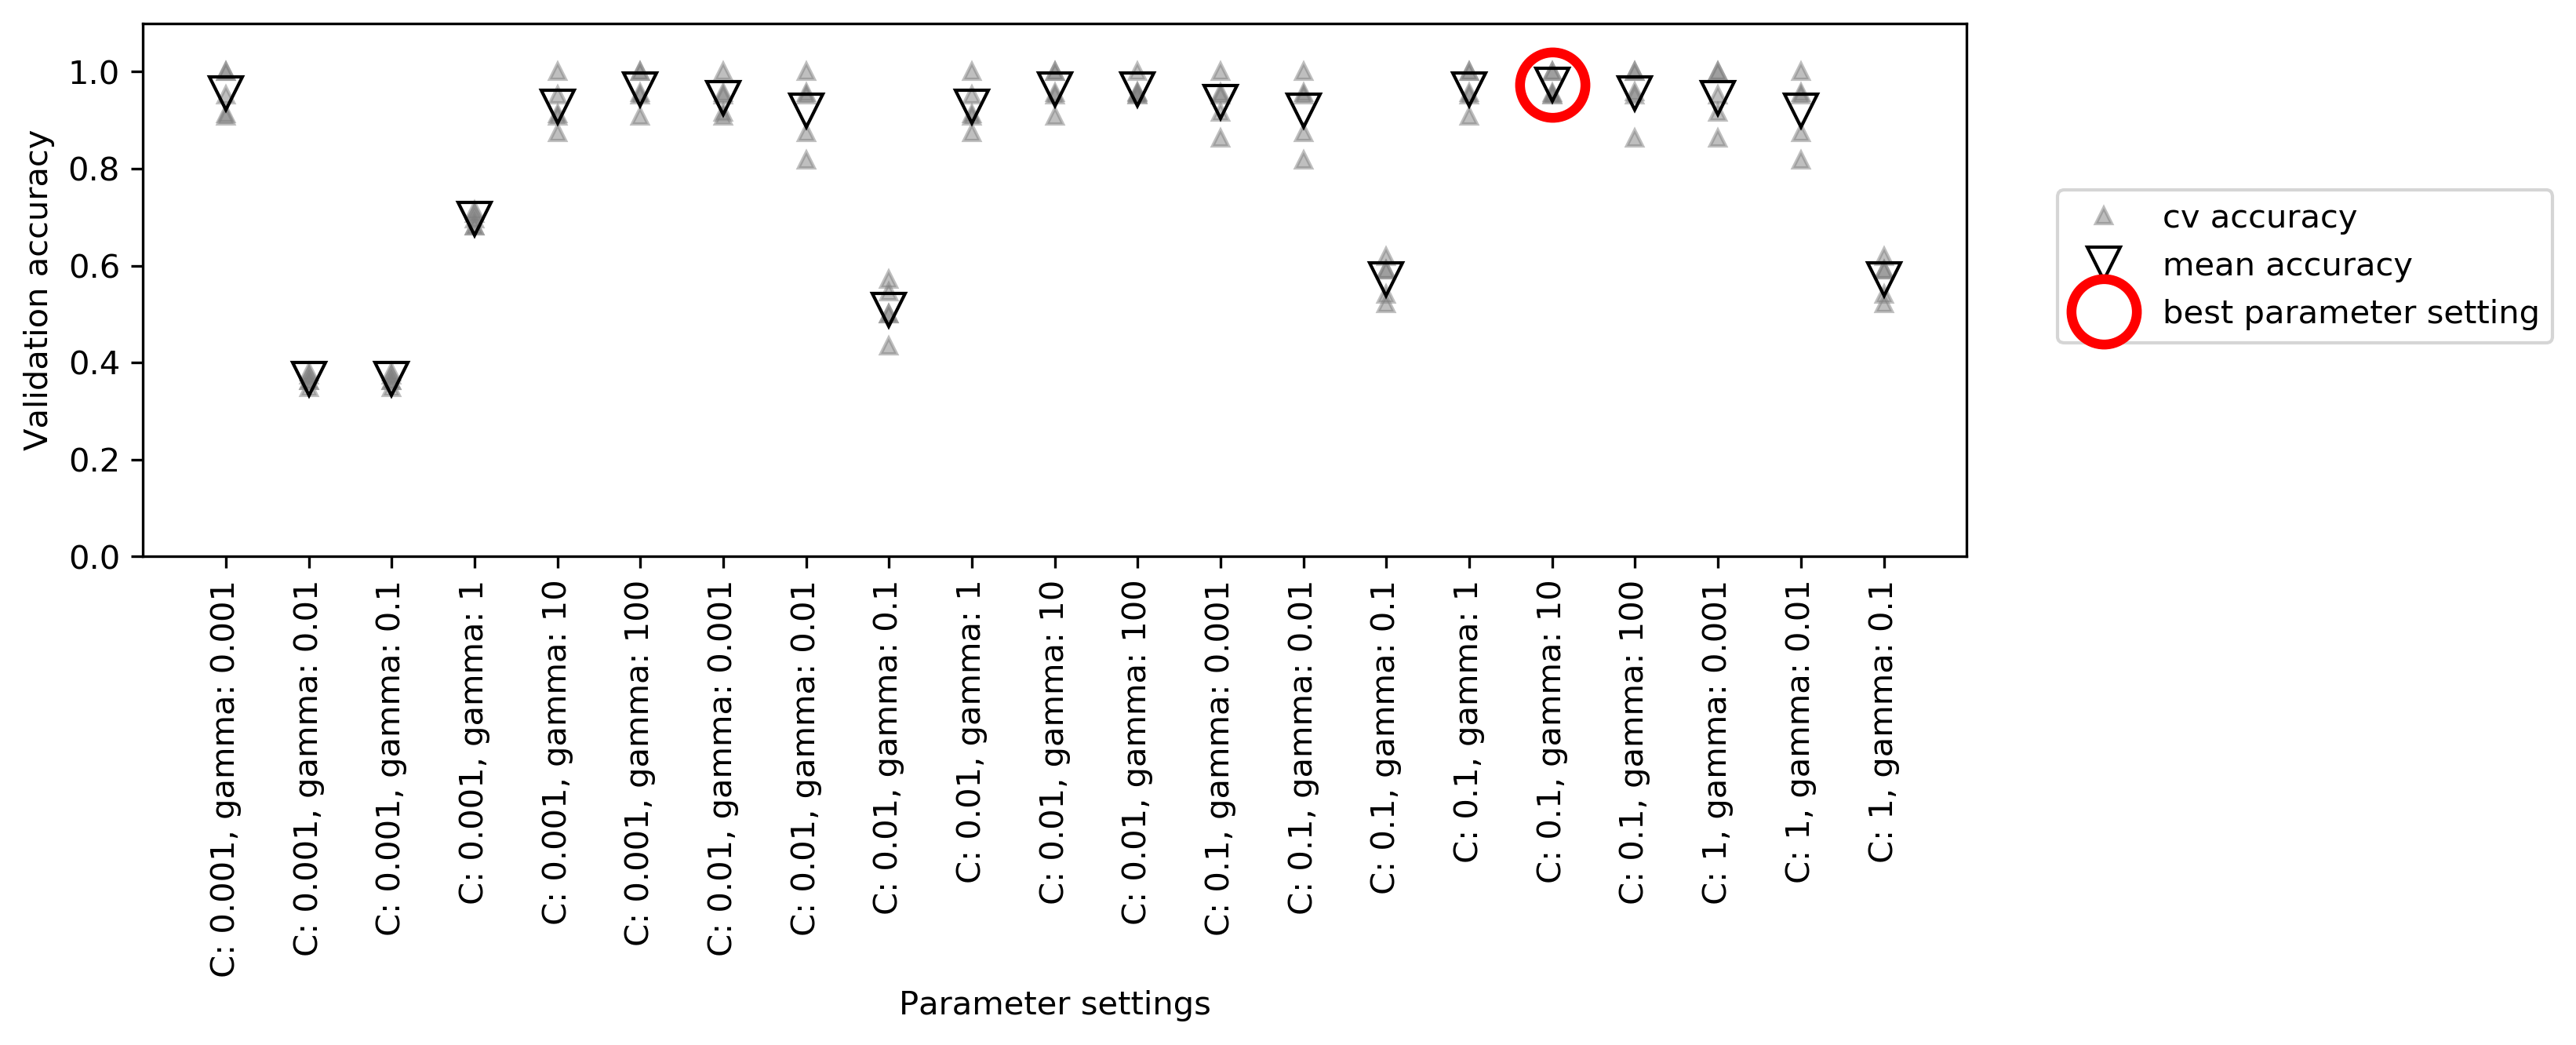

In [28]:
plot_cross_val_selection()

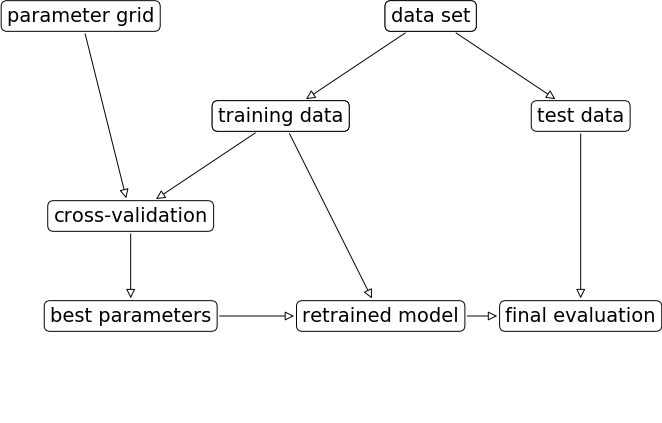

In [29]:
plot_grid_search_overview()

In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [33]:
grid_search.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [34]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [35]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [36]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [37]:
#import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.45e-04,1.93e-04,3.66e-04,6.04e-05,...,0.37,0.36,0.37,2.85e-03
1,8.79e-04,1.53e-04,4.47e-04,6.41e-05,...,0.37,0.36,0.37,2.85e-03
2,8.12e-04,1.01e-04,3.95e-04,6.05e-05,...,0.37,0.36,0.37,2.85e-03
3,9.71e-04,1.60e-04,4.76e-04,5.91e-05,...,0.37,0.36,0.37,2.85e-03
4,7.32e-04,6.93e-05,3.25e-04,3.51e-05,...,0.37,0.36,0.37,2.85e-03


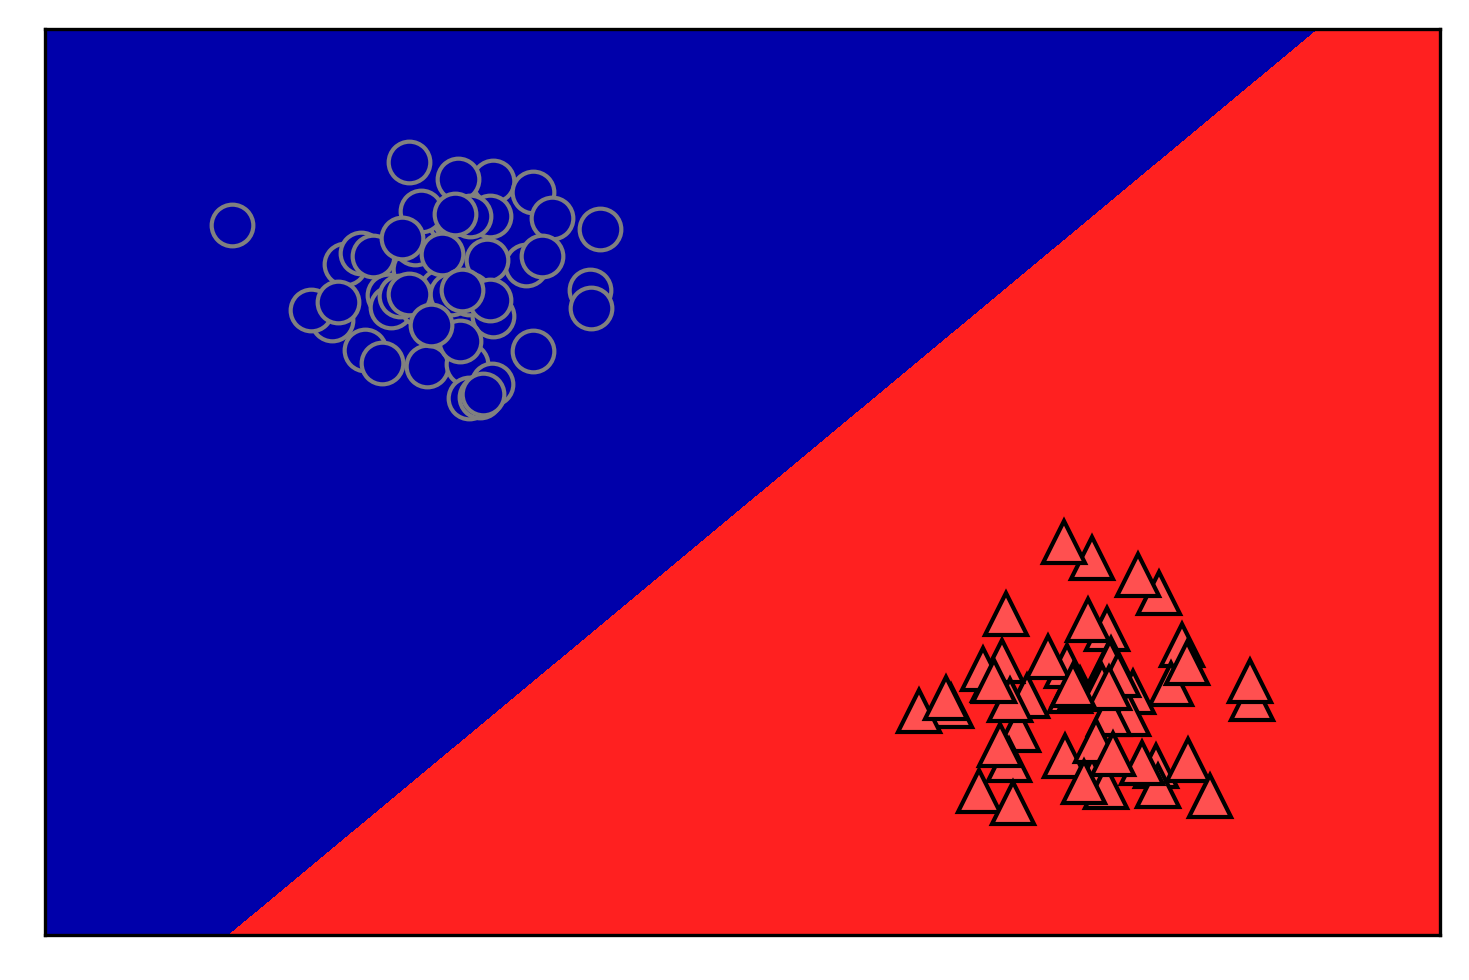

In [38]:
#Ch5 - plot-2d-Seperator
#import numpy as np
#import matplotlib.pyplot as plt
#from .plot_helpers import cm2, cm3, discrete_scatter

def _call_classifier_chunked(classifier_pred_or_decide, X):
    # The chunk_size is used to chunk the large arrays to work with x86
    # memory models that are restricted to < 2 GB in memory allocation. The
    # chunk_size value used here is based on a measurement with the
    # MLPClassifier using the following parameters:
    # MLPClassifier(solver='lbfgs', random_state=0,
    #               hidden_layer_sizes=[1000,1000,1000])
    # by reducing the value it is possible to trade in time for memory.
    # It is possible to chunk the array as the calculations are independent of
    # each other.
    # Note: an intermittent version made a distinction between
    # 32- and 64 bit architectures avoiding the chunking. Testing revealed
    # that even on 64 bit architectures the chunking increases the
    # performance by a factor of 3-5, largely due to the avoidance of memory
    # swapping.
    chunk_size = 10000

    # We use a list to collect all result chunks
    Y_result_chunks = []

    # Call the classifier in chunks.
    for x_chunk in np.array_split(X, np.arange(chunk_size, X.shape[0],
                                               chunk_size, dtype=np.int32),
                                  axis=0):
        Y_result_chunks.append(classifier_pred_or_decide(x_chunk))

    return np.concatenate(Y_result_chunks)


def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,
                           alpha=1, cm=cm3):
    # multiclass
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_2d_scores(classifier, X, ax=None, eps=None, alpha=1, cm="viridis",
                   function=None):
    # binary with fill
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if function is None:
        function = getattr(classifier, "decision_function",
                           getattr(classifier, "predict_proba"))
    else:
        function = getattr(classifier, function)
    decision_values = function(X_grid)
    if decision_values.ndim > 1 and decision_values.shape[1] > 1:
        # predict_proba
        decision_values = decision_values[:, 1]
    grr = ax.imshow(decision_values.reshape(X1.shape),
                    extent=(x_min, x_max, y_min, y_max), aspect='auto',
                    origin='lower', alpha=alpha, cmap=cm)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return grr


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if hasattr(classifier, "decision_function"):
        decision_values = _call_classifier_chunked(classifier.decision_function,
                                                   X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    else:
        # no decision_function
        decision_values = _call_classifier_chunked(classifier.predict_proba,
                                                   X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression(solver='lbfgs').fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    discrete_scatter(X[:, 0], X[:, 1], y)
    plt.show()


In [39]:
#ch5 - tools
#import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#from .plot_2d_separator import (plot_2d_separator, plot_2d_classification,
                                #plot_2d_scores)
#from .plot_helpers import cm2 as cm, discrete_scatter


def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = [cm(1) if c < 0 else cm(0)
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")


def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img


def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def print_topics(topics, feature_names, sorting, topics_per_chunk=6,
                 n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


def get_tree(tree, **kwargs):
    try:
        # python3
        from io import StringIO
    except ImportError:
        # python2
        from StringIO import StringIO
    f = StringIO()
    export_graphviz(tree, f, **kwargs)
    import graphviz
    return graphviz.Source(f.getvalue())

__all__ = ['plot_2d_separator', 'plot_2d_classification', 'plot_2d_scores',
           'cm', 'visualize_coefficients', 'print_topics', 'heatmap',
           'discrete_scatter']


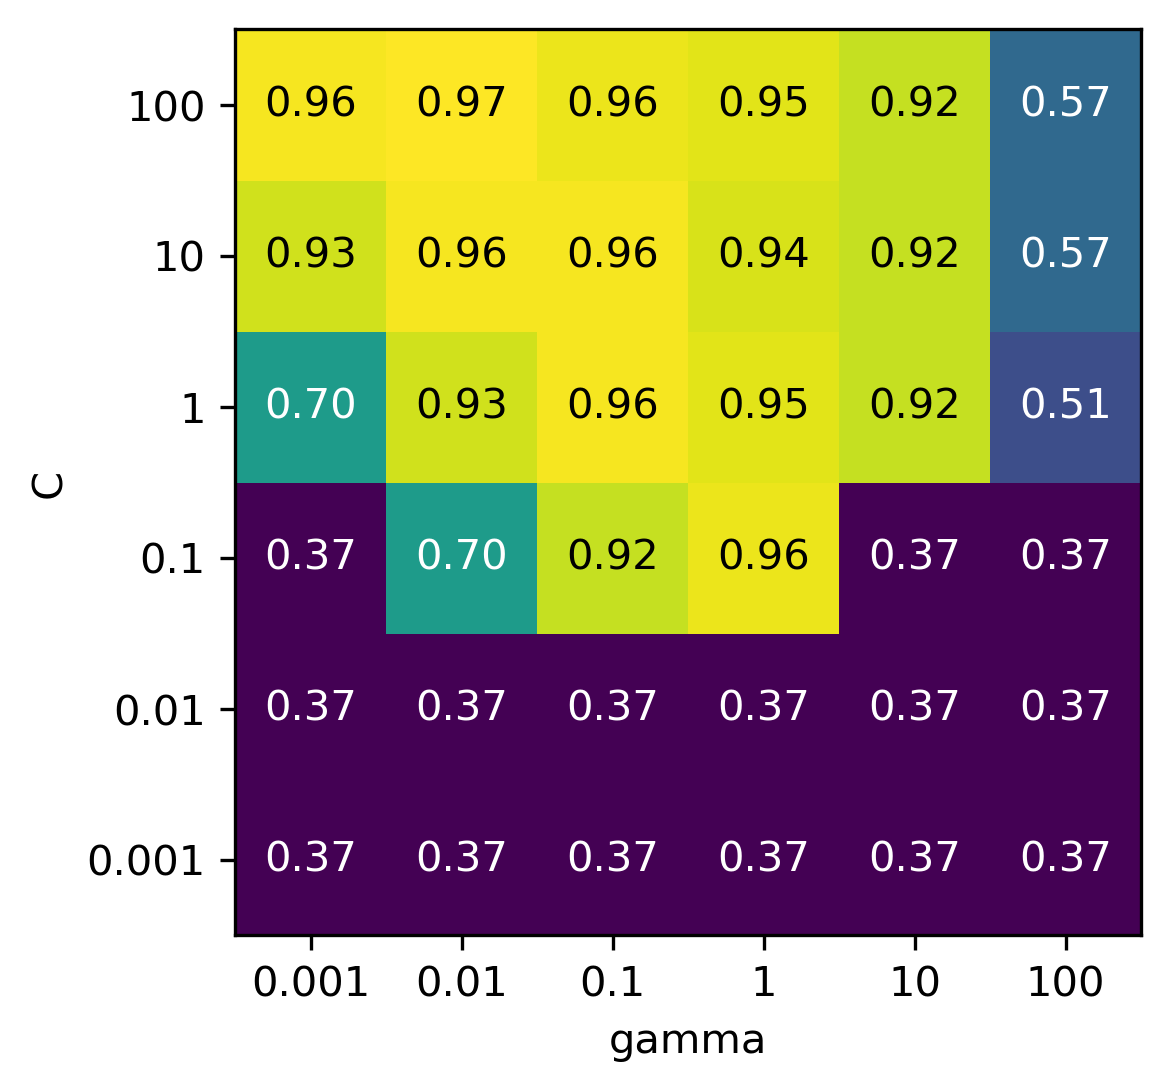

In [40]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


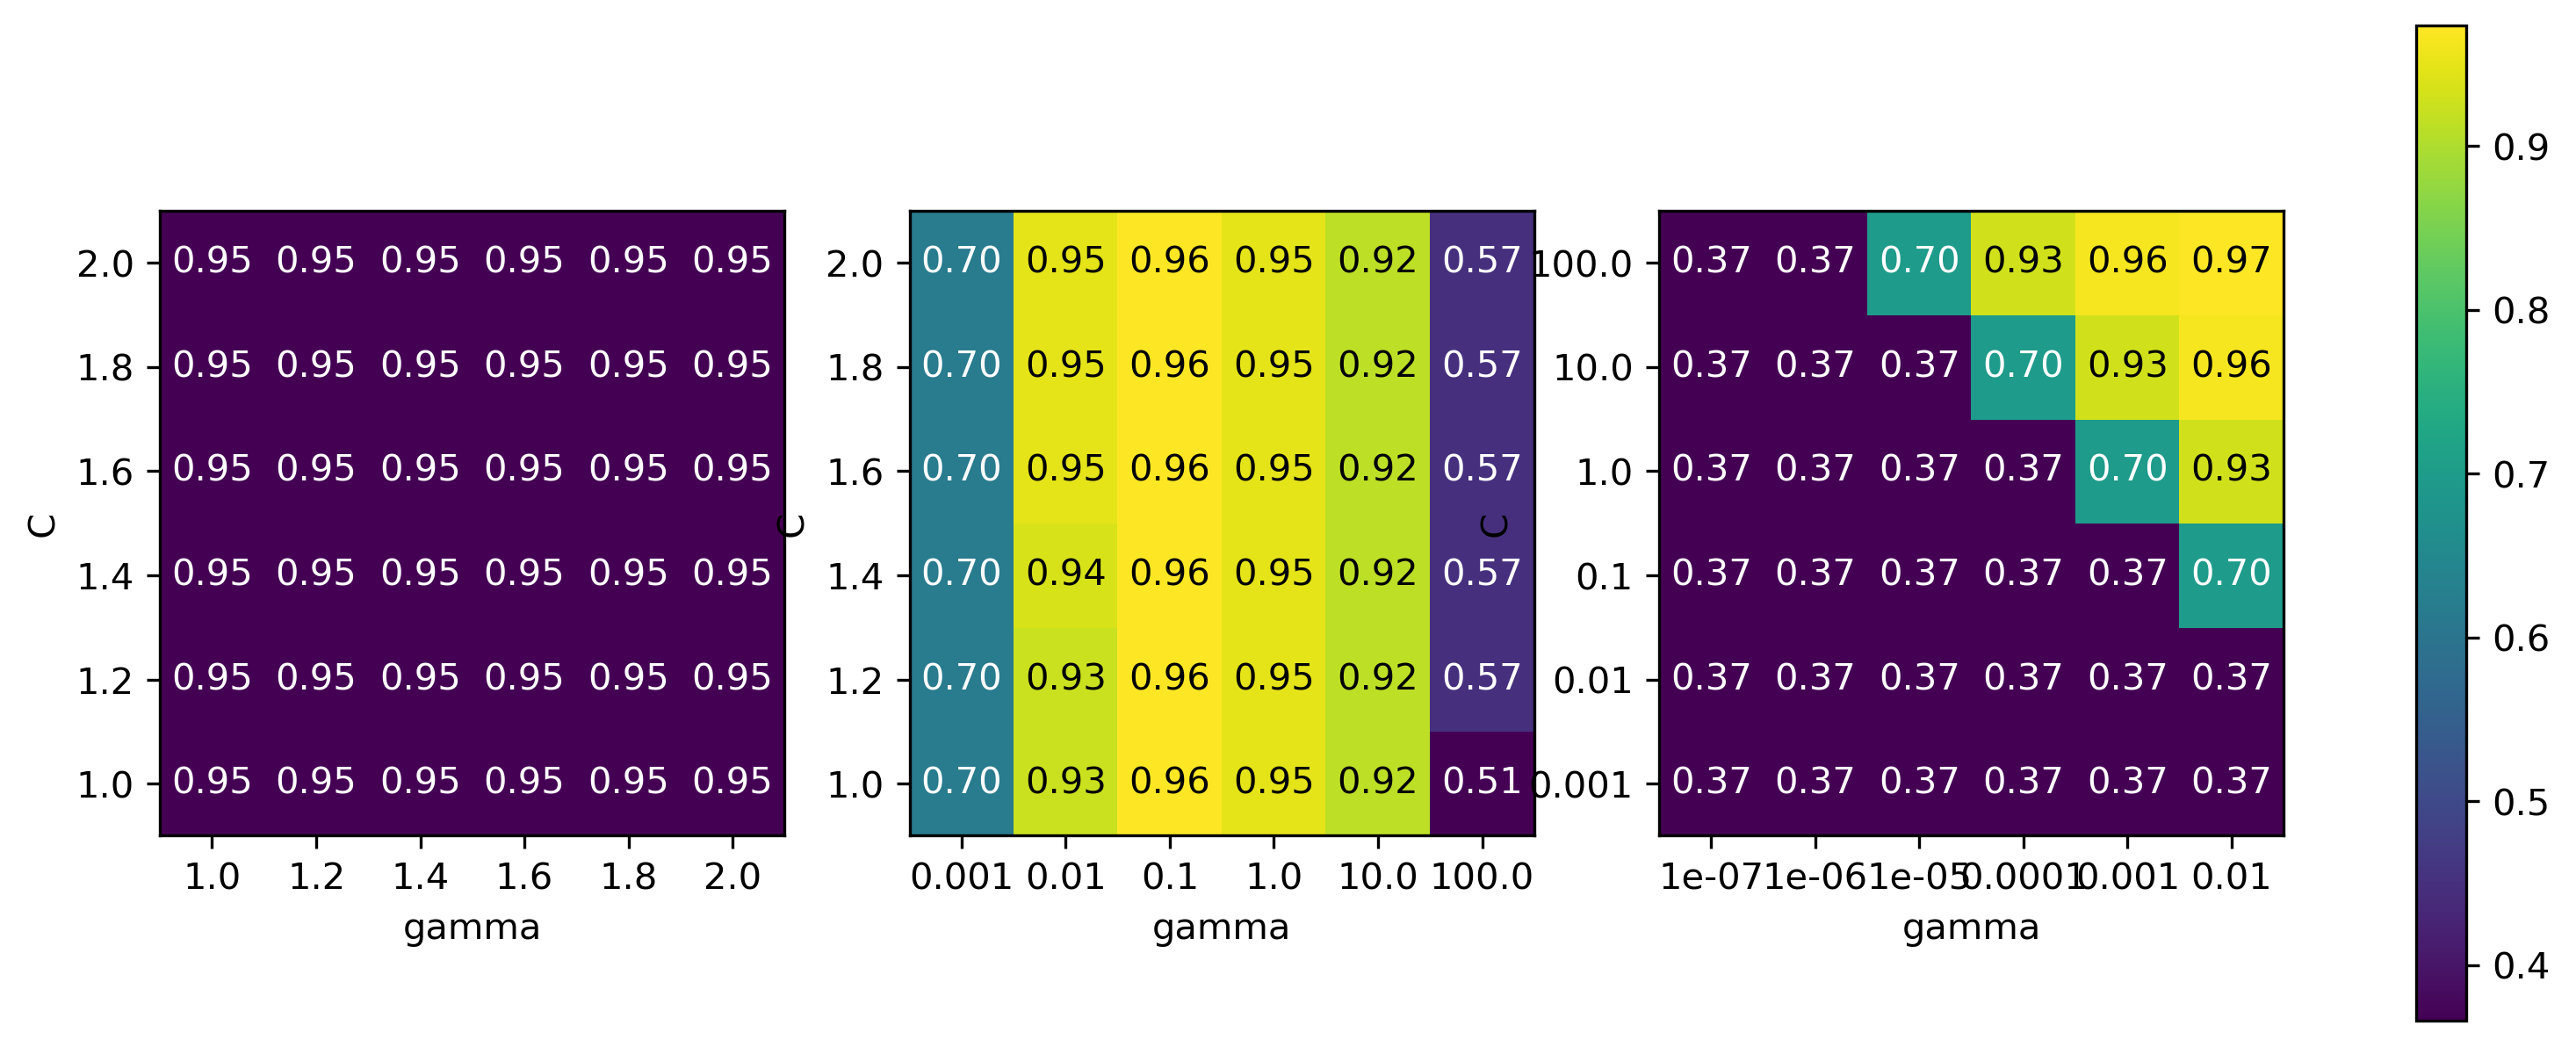

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())


In [42]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [43]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0012,0.00077,0.00079,0.00085,...,0.00043,0.00043,0.00043,0.00043
std_fit_time,0.00065,7.7e-05,0.00013,0.00013,...,7.2e-06,1.2e-05,1.5e-05,3.1e-05
mean_score_time,0.00048,0.00038,0.00038,0.0004,...,0.00027,0.00026,0.00026,0.00026
std_score_time,0.00011,5.8e-05,6.2e-05,4.1e-05,...,6.5e-06,1.1e-06,9e-07,7.7e-06
param_C,0.001,0.001,0.001,0.001,...,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.38,0.38,0.38,0.38,...,0.96,1,0.96,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1,1


In [45]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


In [46]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [47]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]


In [48]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [49]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [51]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


In [53]:
# Ch5 -plot_confusion_matrix
#import numpy as np
#import matplotlib.pyplot as plt

#from .tools import plot_2d_separator, plot_2d_scores, cm, discrete_scatter
#from .plot_helpers import ReBl


def plot_confusion_matrix_illustration():
    plt.figure(figsize=(8, 8))
    confusion = np.array([[401, 2], [8, 39]])
    plt.text(0.40, .7, confusion[0, 0], size=70, horizontalalignment='right')
    plt.text(0.40, .2, confusion[1, 0], size=70, horizontalalignment='right')
    plt.text(.90, .7, confusion[0, 1], size=70, horizontalalignment='right')
    plt.text(.90, 0.2, confusion[1, 1], size=70, horizontalalignment='right')
    plt.xticks([.25, .75], ["predicted 'not nine'", "predicted 'nine'"], size=20)
    plt.yticks([.25, .75], ["true 'nine'", "true 'not nine'"], size=20)
    plt.plot([.5, .5], [0, 1], '--', c='k')
    plt.plot([0, 1], [.5, .5], '--', c='k')

    plt.xlim(0, 1)
    plt.ylim(0, 1)


def plot_binary_confusion_matrix():
    plt.text(0.45, .6, "TN", size=100, horizontalalignment='right')
    plt.text(0.45, .1, "FN", size=100, horizontalalignment='right')
    plt.text(.95, .6, "FP", size=100, horizontalalignment='right')
    plt.text(.95, 0.1, "TP", size=100, horizontalalignment='right')
    plt.xticks([.25, .75], ["predicted negative", "predicted positive"], size=15)
    plt.yticks([.25, .75], ["positive class", "negative class"], size=15)
    plt.plot([.5, .5], [0, 1], '--', c='k')
    plt.plot([0, 1], [.5, .5], '--', c='k')

    plt.xlim(0, 1)
    plt.ylim(0, 1)


def plot_decision_threshold():
    from sklearn.datasets import make_blobs
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split

    X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                      random_state=22)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    fig, axes = plt.subplots(2, 3, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    plt.suptitle("decision_threshold")
    axes[0, 0].set_title("training data")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 0])

    svc = SVC(gamma=.05).fit(X_train, y_train)
    axes[0, 1].set_title("decision with threshold 0")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 1])
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 1], cm=ReBl)
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 1])
    axes[0, 2].set_title("decision with threshold -0.8")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 2])
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 2], threshold=-.8)
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 2], cm=ReBl)

    axes[1, 0].set_axis_off()

    mask = np.abs(X_train[:, 1] - 7) < 5
    bla = np.sum(mask)

    line = np.linspace(X_train.min(), X_train.max(), 100)
    axes[1, 1].set_title("Cross-section with threshold 0")
    axes[1, 1].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    dec = svc.decision_function(np.c_[line, 10 * np.ones(100)])
    contour = (dec > 0).reshape(1, -1).repeat(10, axis=0)
    axes[1, 1].contourf(line, np.linspace(-1.5, 1.5, 10), contour, alpha=0.4, cmap=cm)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], ax=axes[1, 1])
    axes[1, 1].set_xlim(X_train.min(), X_train.max())
    axes[1, 1].set_ylim(-1.5, 1.5)
    axes[1, 1].set_xticks(())
    axes[1, 1].set_ylabel("Decision value")

    contour2 = (dec > -.8).reshape(1, -1).repeat(10, axis=0)
    axes[1, 2].set_title("Cross-section with threshold -0.8")
    axes[1, 2].contourf(line, np.linspace(-1.5, 1.5, 10), contour2, alpha=0.4, cmap=cm)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], alpha=.1, ax=axes[1, 2])
    axes[1, 2].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    axes[1, 2].set_xlim(X_train.min(), X_train.max())
    axes[1, 2].set_ylim(-1.5, 1.5)
    axes[1, 2].set_xticks(())
    axes[1, 2].set_ylabel("Decision value")
    axes[1, 0].legend(['negative class', 'positive class'])

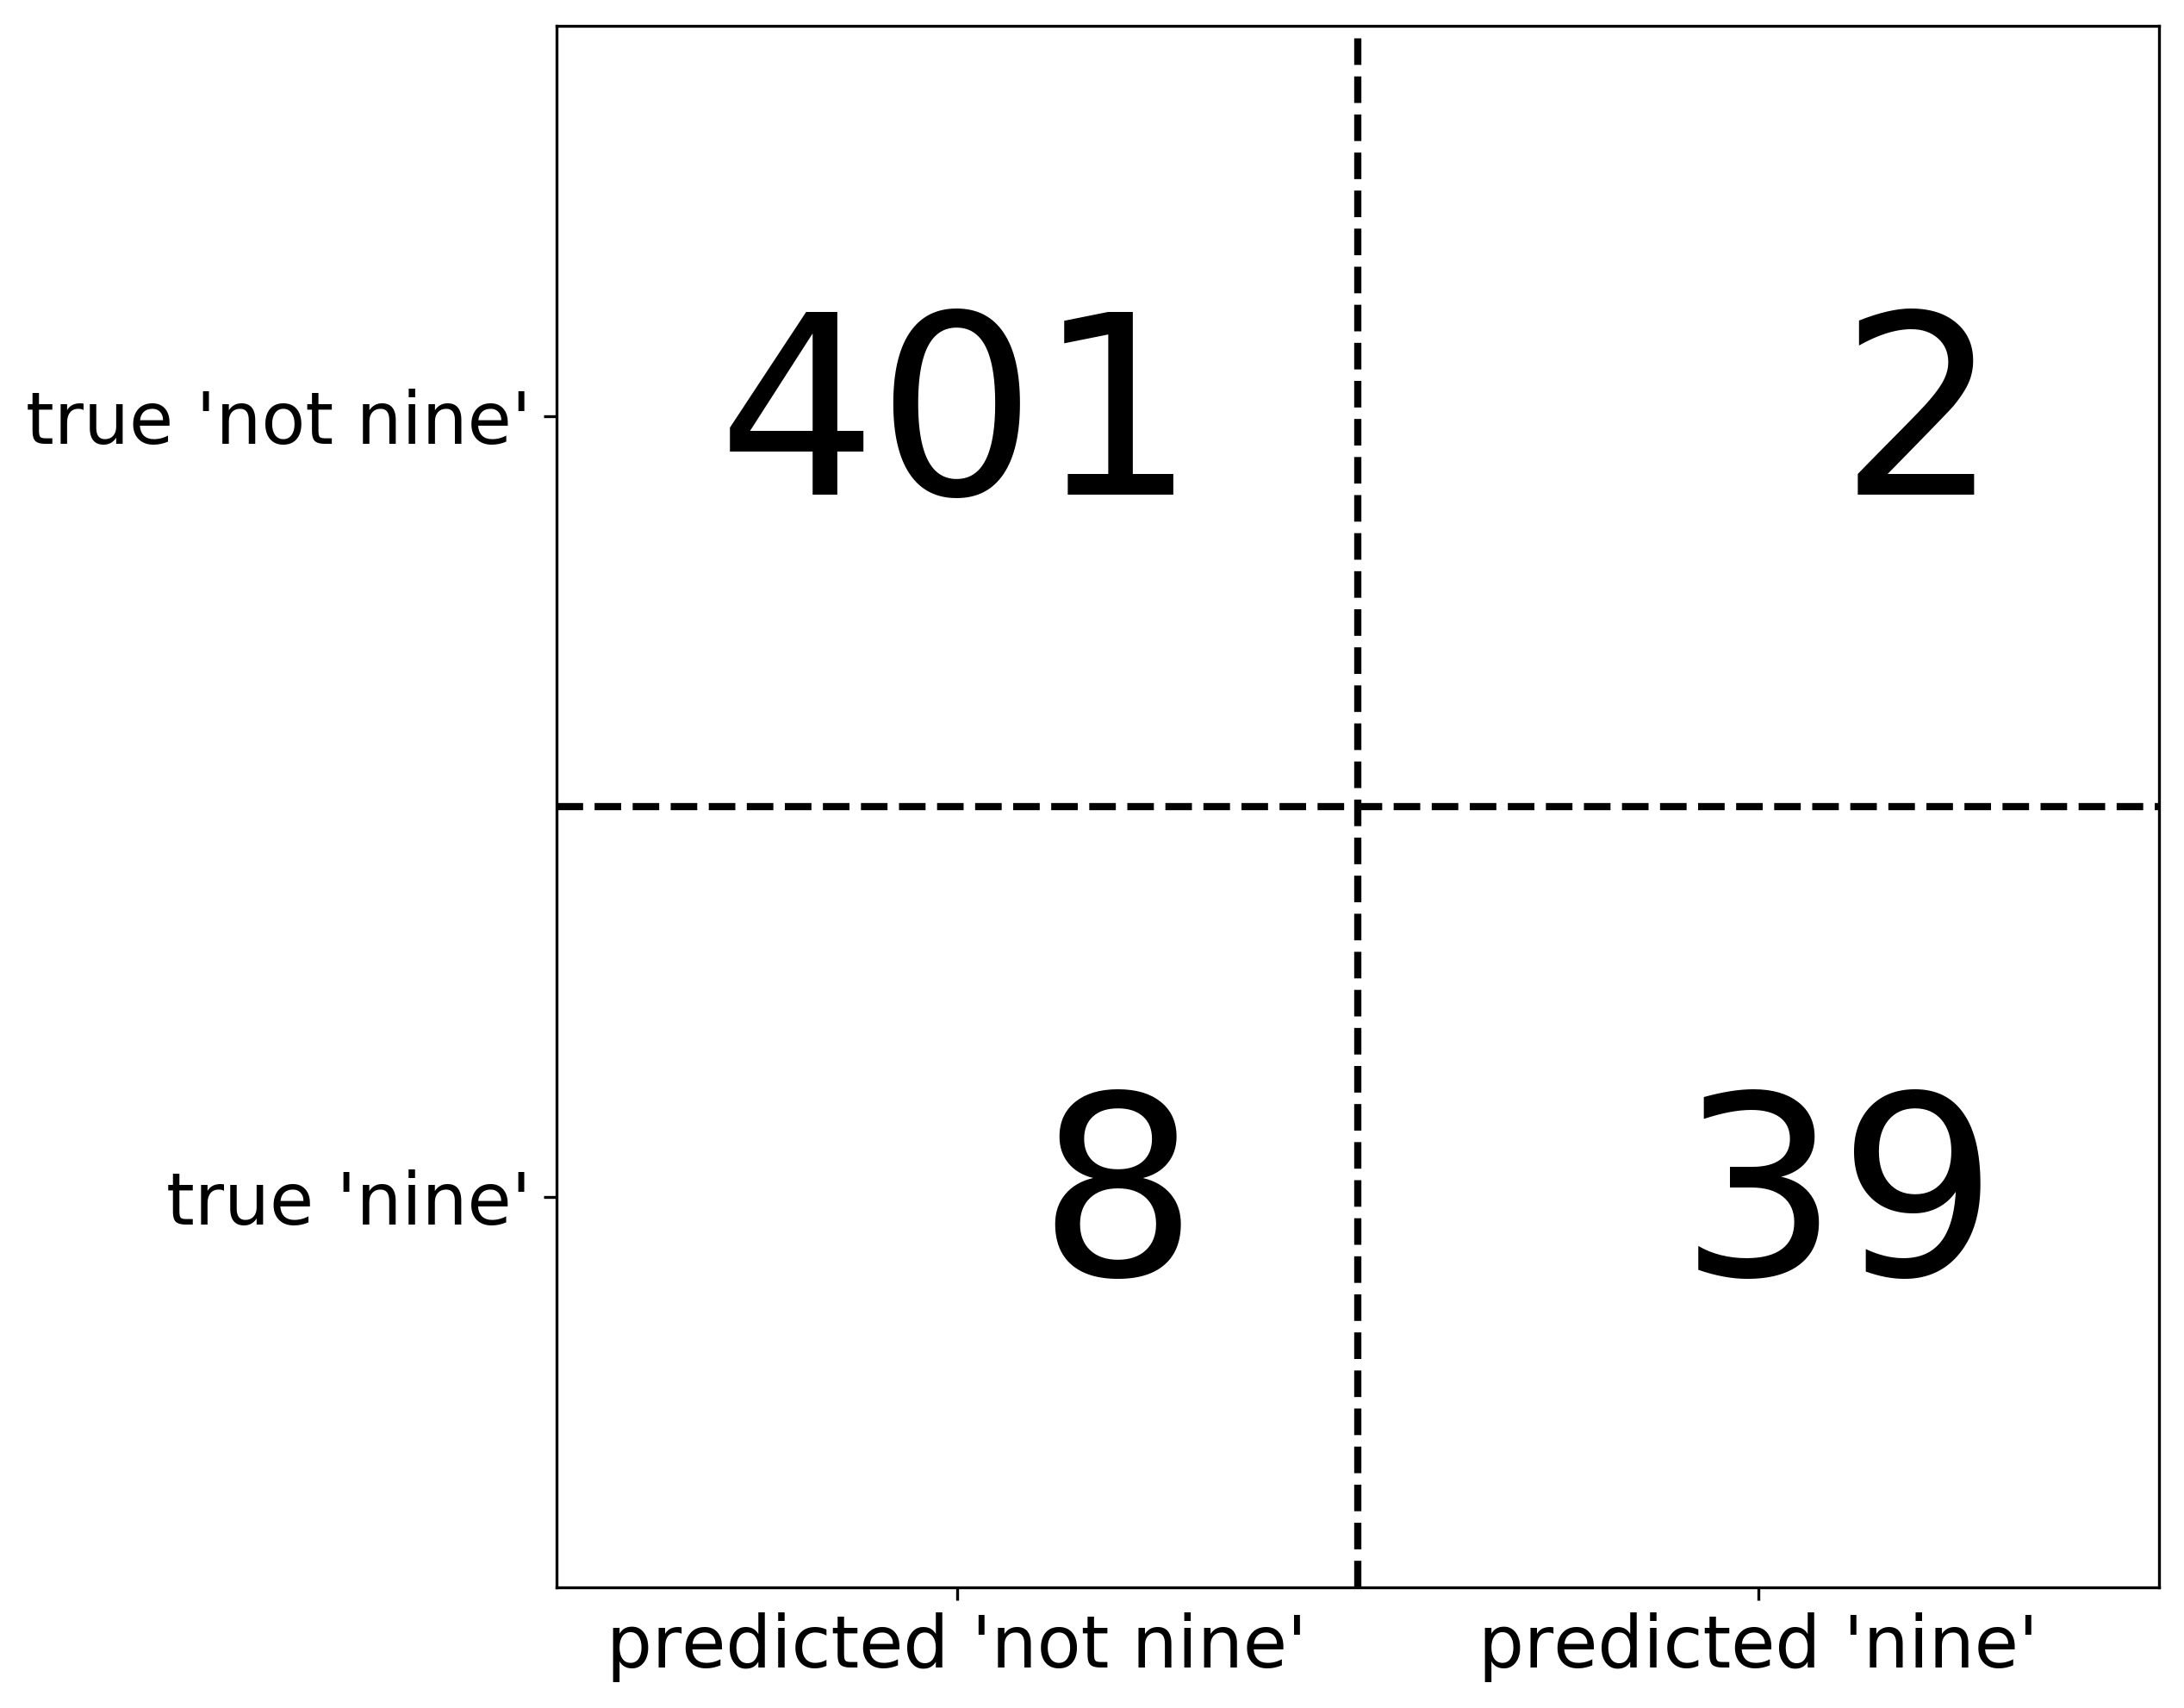

In [54]:
plot_confusion_matrix_illustration()

In [55]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[370  33]
 [ 44   3]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [56]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.07
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.89      0.92      0.91       403
        nine       0.08      0.06      0.07        47

    accuracy                           0.83       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.83      0.82       450



In [59]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [60]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [61]:
# Ch5 -plot_confusion_matrix
# change to cmap=cm2;cm3
#import numpy as np
#import matplotlib.pyplot as plt

#from .tools import plot_2d_separator, plot_2d_scores, cm, discrete_scatter
#from .plot_helpers import ReBl



def plot_decision_threshold():
    from sklearn.datasets import make_blobs
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split

    X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                      random_state=22)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    fig, axes = plt.subplots(2, 3, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    plt.suptitle("decision_threshold")
    axes[0, 0].set_title("training data")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 0])

    svc = SVC(gamma=.05).fit(X_train, y_train)
    axes[0, 1].set_title("decision with threshold 0")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 1])
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 1], cm=ReBl)
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 1])
    axes[0, 2].set_title("decision with threshold -0.8")
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 2])
    plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 2], threshold=-.8)
    plot_2d_scores(svc, X_train, function="decision_function", alpha=.7,
                   ax=axes[0, 2], cm=ReBl)

    axes[1, 0].set_axis_off()

    mask = np.abs(X_train[:, 1] - 7) < 5
    bla = np.sum(mask)

    line = np.linspace(X_train.min(), X_train.max(), 100)
    axes[1, 1].set_title("Cross-section with threshold 0")
    axes[1, 1].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    dec = svc.decision_function(np.c_[line, 10 * np.ones(100)])
    contour = (dec > 0).reshape(1, -1).repeat(10, axis=0)
    axes[1, 1].contourf(line, np.linspace(-1.5, 1.5, 10), contour, alpha=0.4, cmap=cm2)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], ax=axes[1, 1])
    axes[1, 1].set_xlim(X_train.min(), X_train.max())
    axes[1, 1].set_ylim(-1.5, 1.5)
    axes[1, 1].set_xticks(())
    axes[1, 1].set_ylabel("Decision value")

    contour2 = (dec > -.8).reshape(1, -1).repeat(10, axis=0)
    axes[1, 2].set_title("Cross-section with threshold -0.8")
    axes[1, 2].contourf(line, np.linspace(-1.5, 1.5, 10), contour2, alpha=0.4, cmap=cm3)
    discrete_scatter(X_train[mask, 0], np.zeros(bla), y_train[mask], alpha=.1, ax=axes[1, 2])
    axes[1, 2].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
    axes[1, 2].set_xlim(X_train.min(), X_train.max())
    axes[1, 2].set_ylim(-1.5, 1.5)
    axes[1, 2].set_xticks(())
    axes[1, 2].set_ylabel("Decision value")
    axes[1, 0].legend(['negative class', 'positive class'])

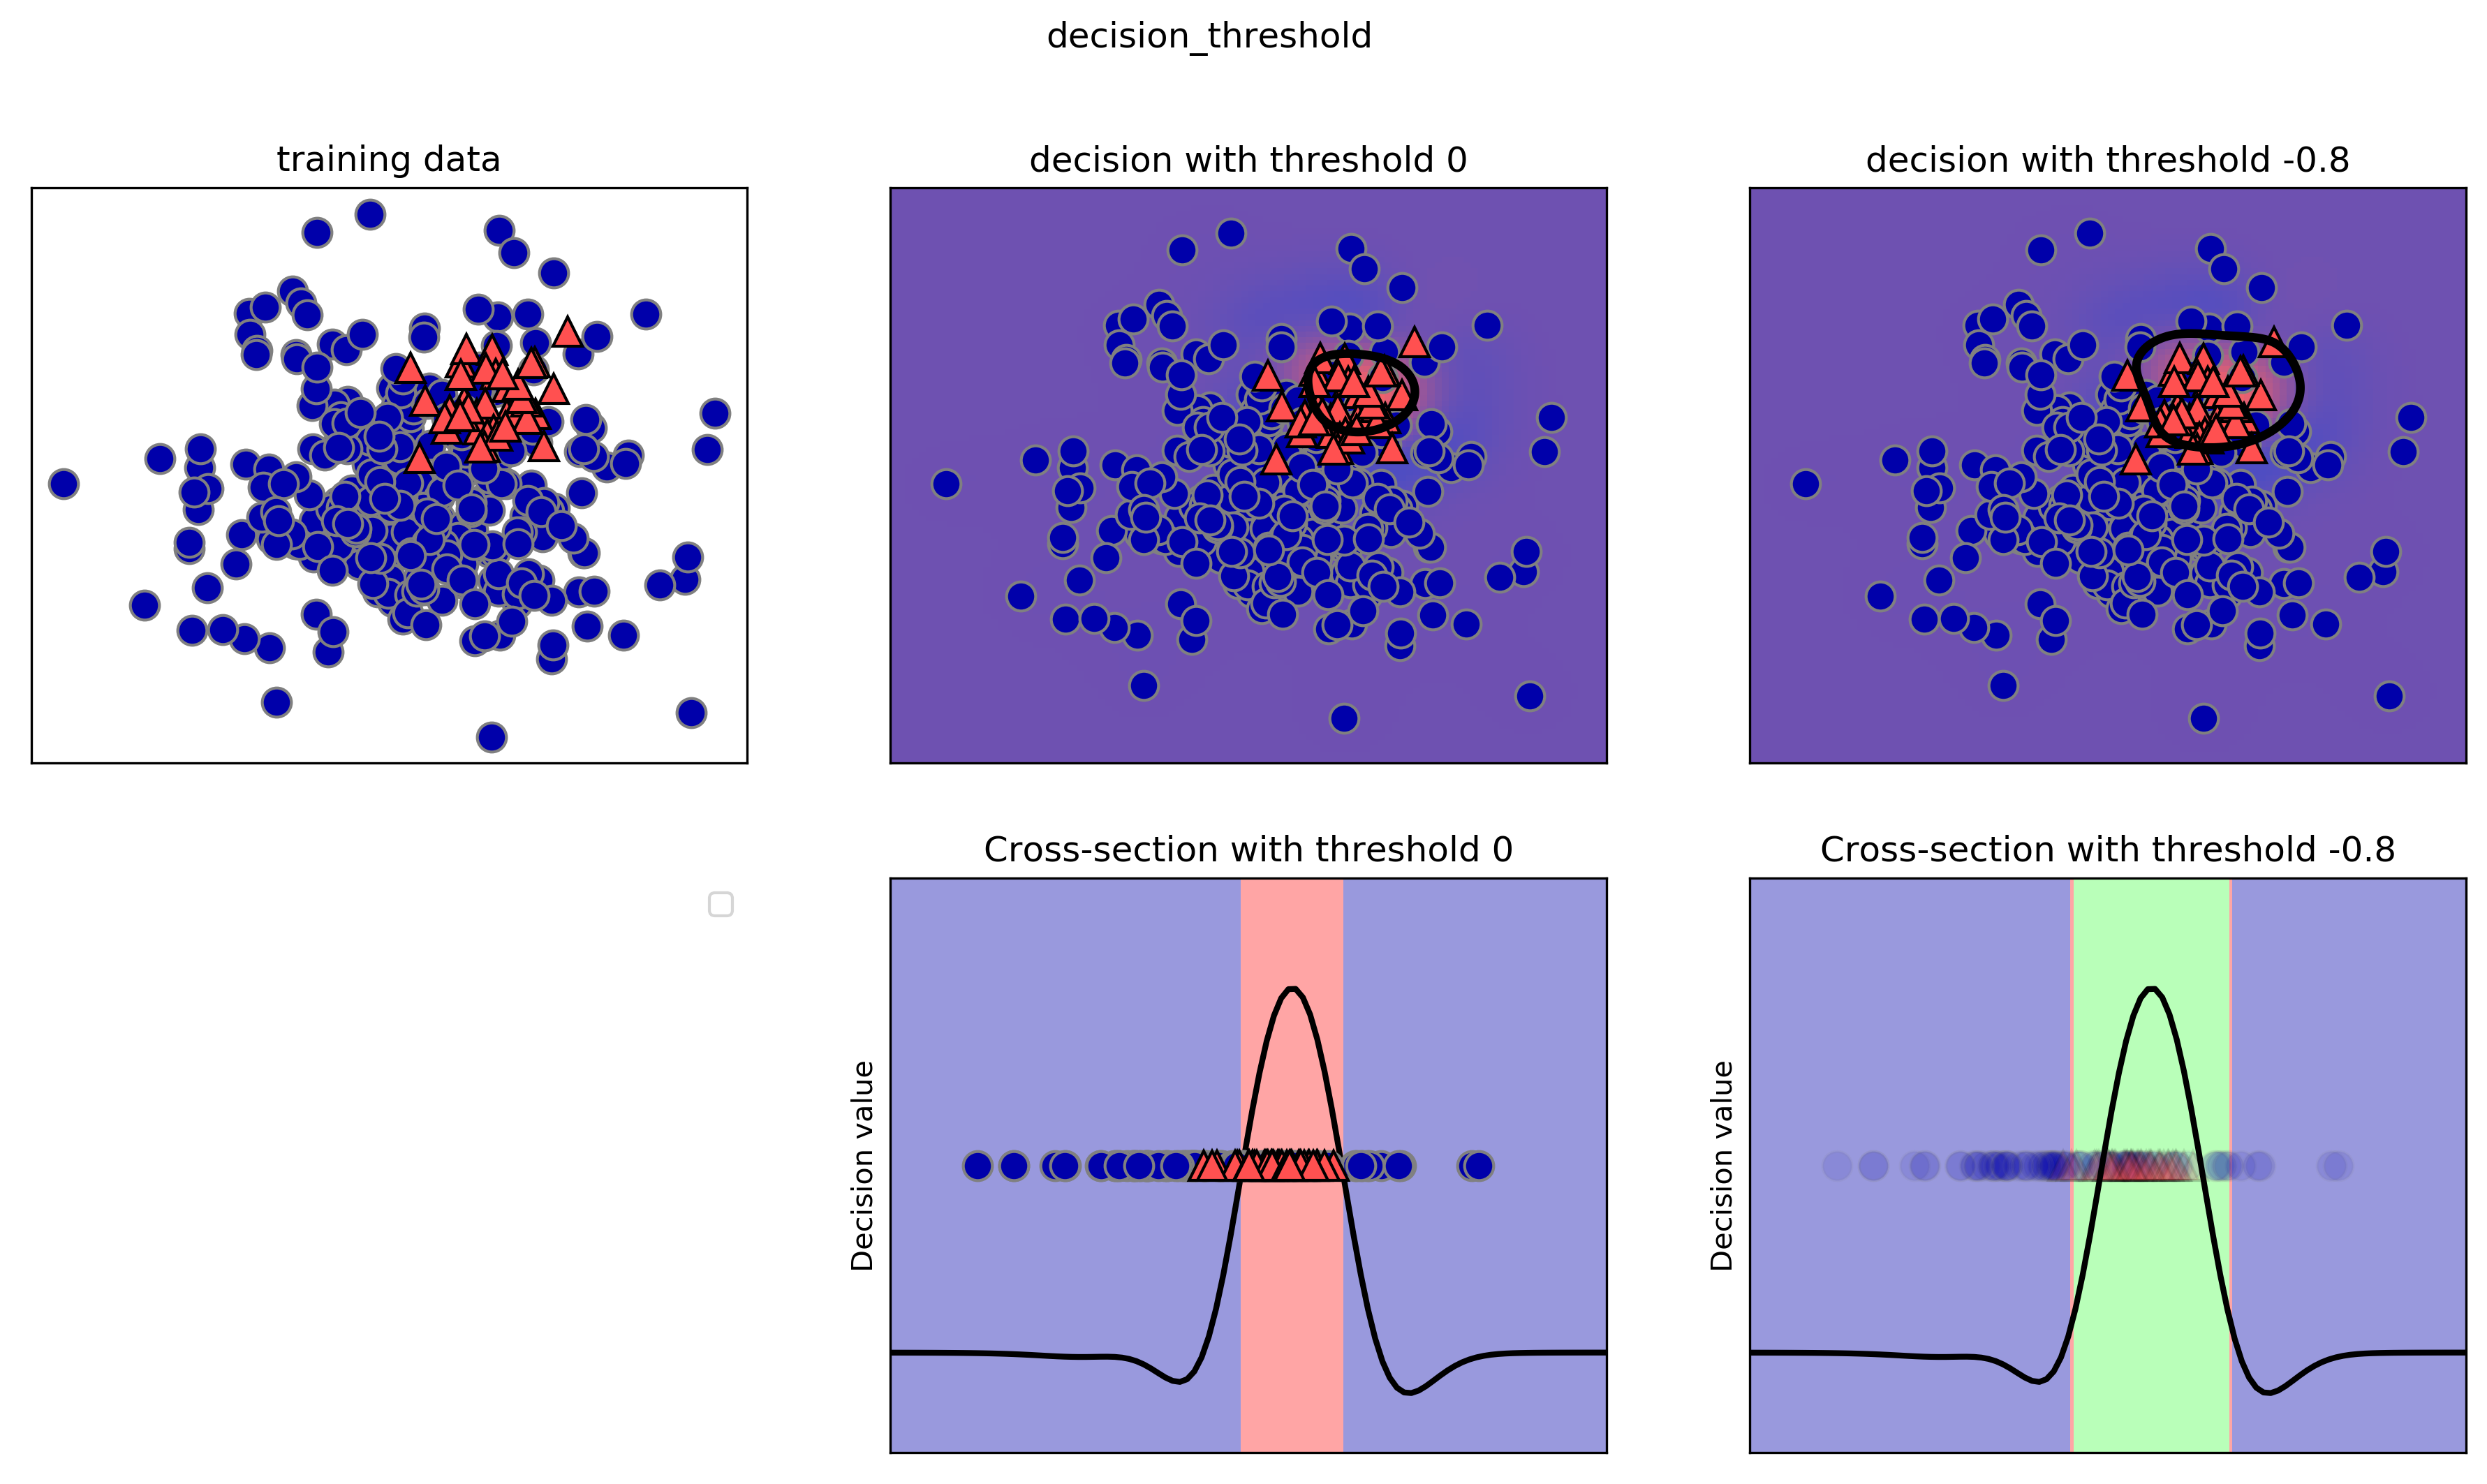

In [62]:
plot_decision_threshold()

In [63]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [64]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [65]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [66]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

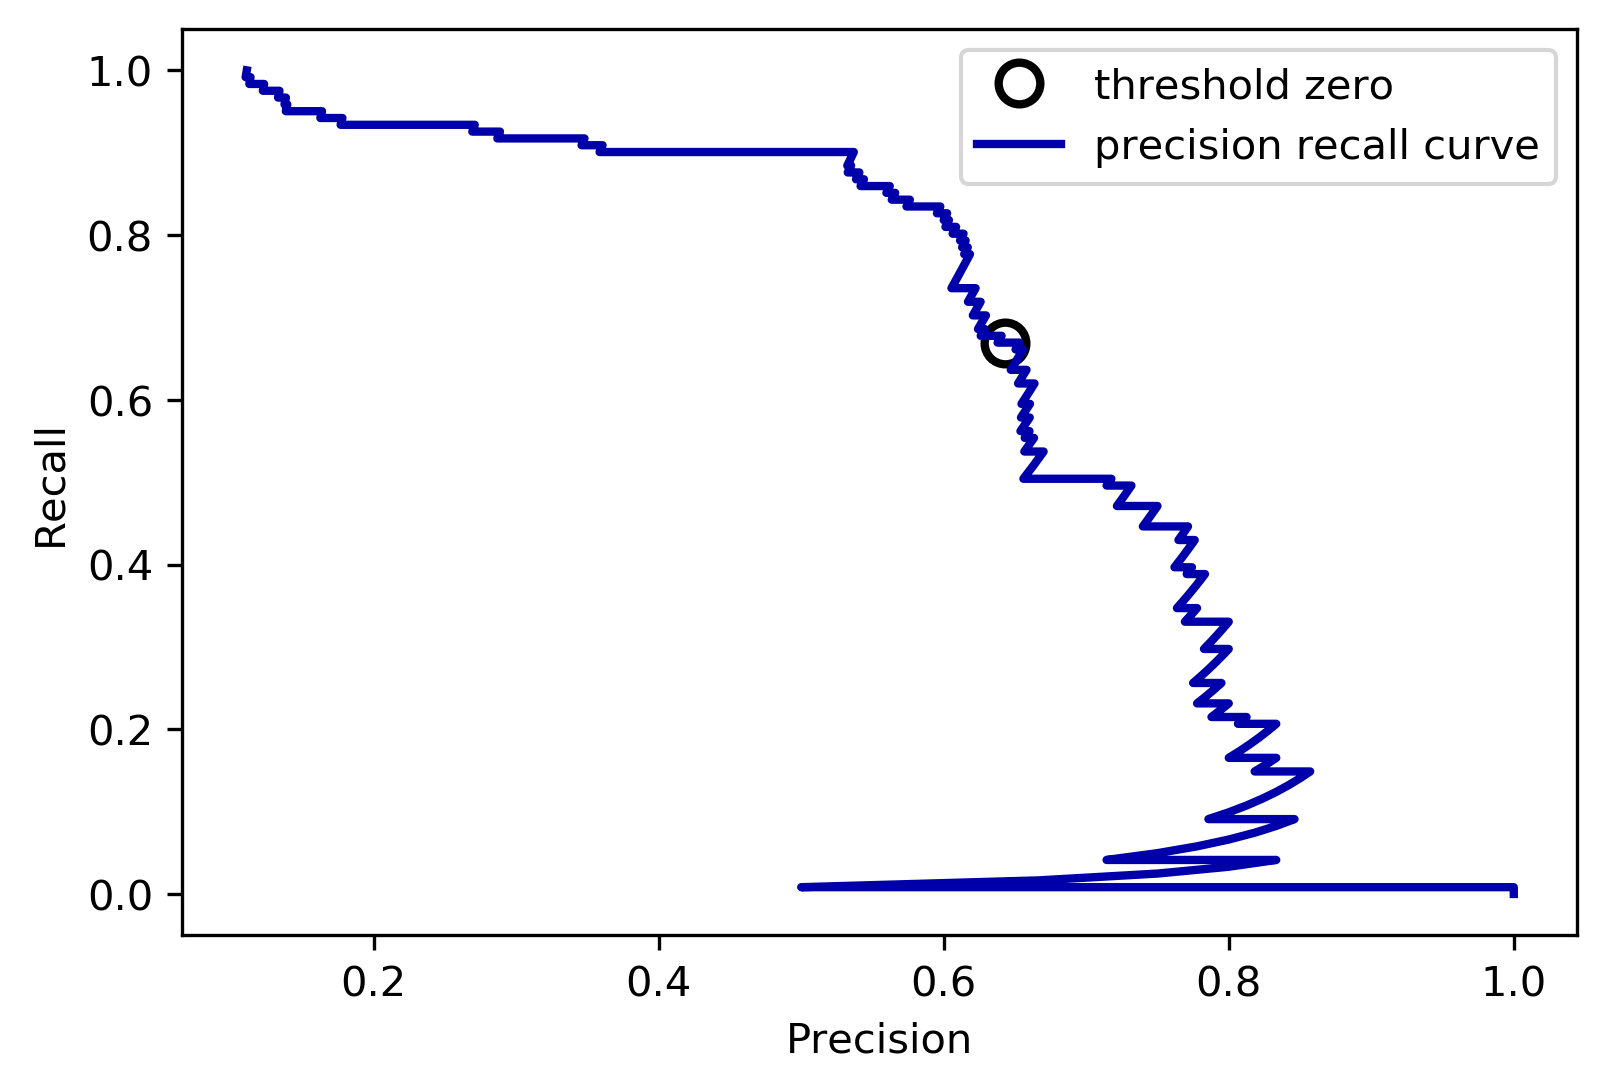

In [67]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

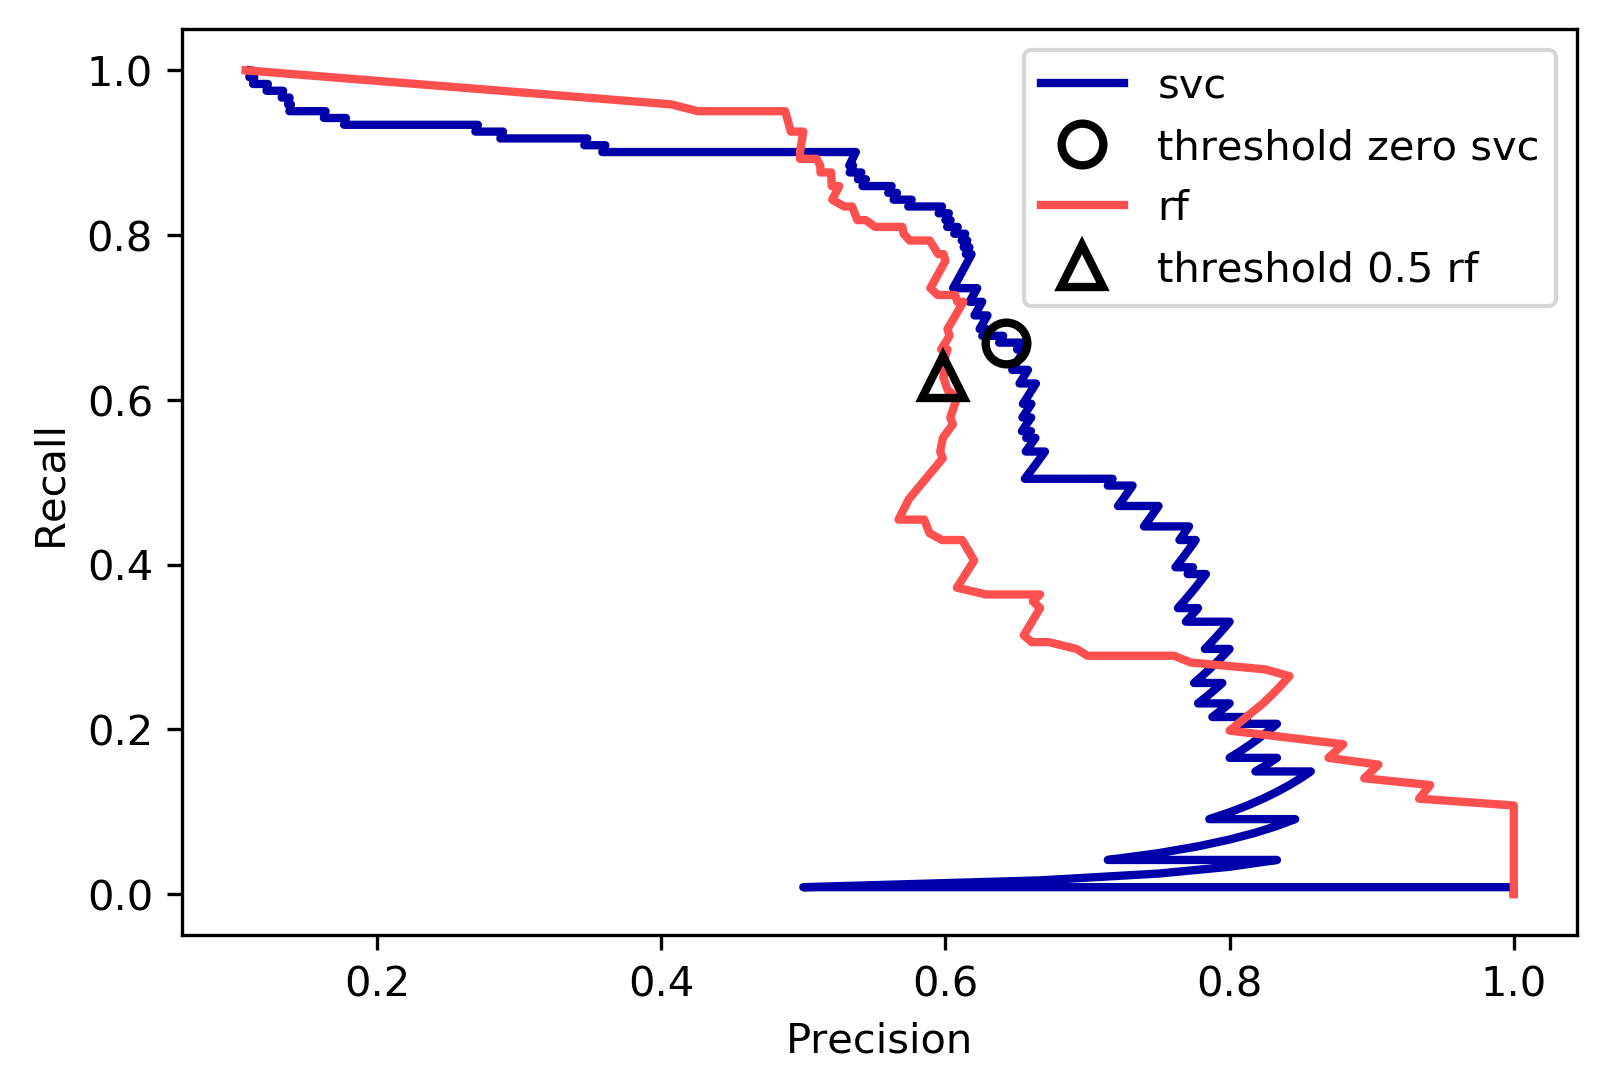

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [69]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [70]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


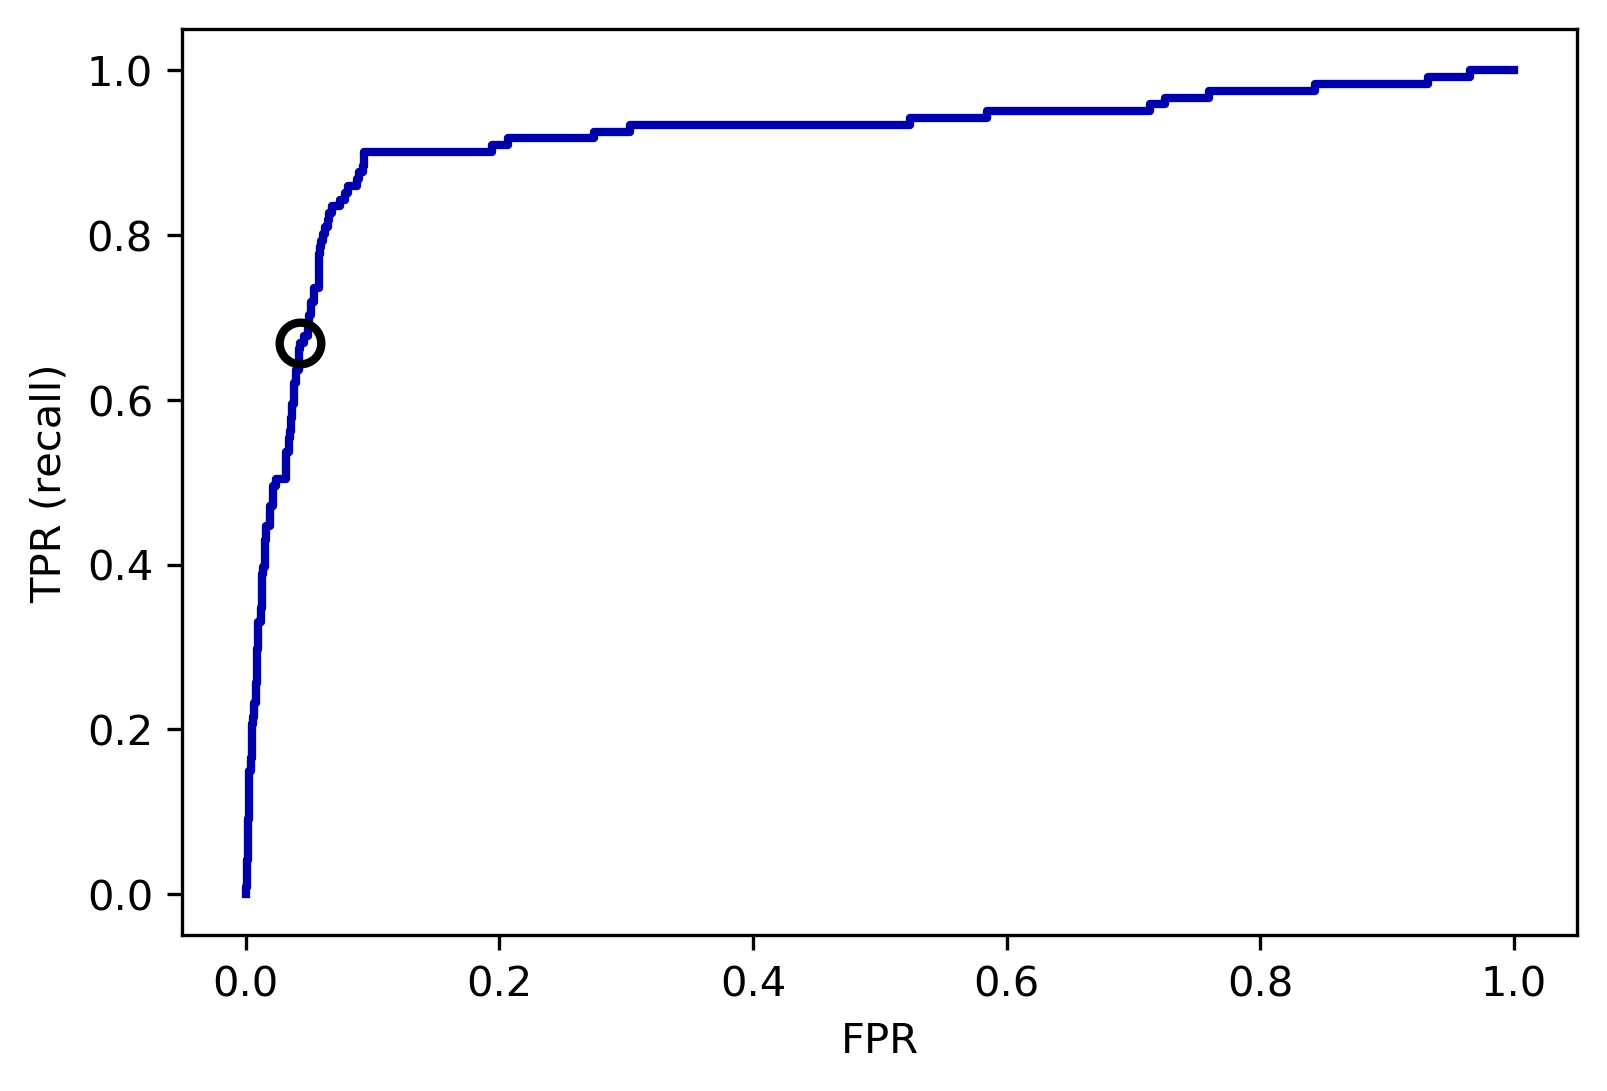

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

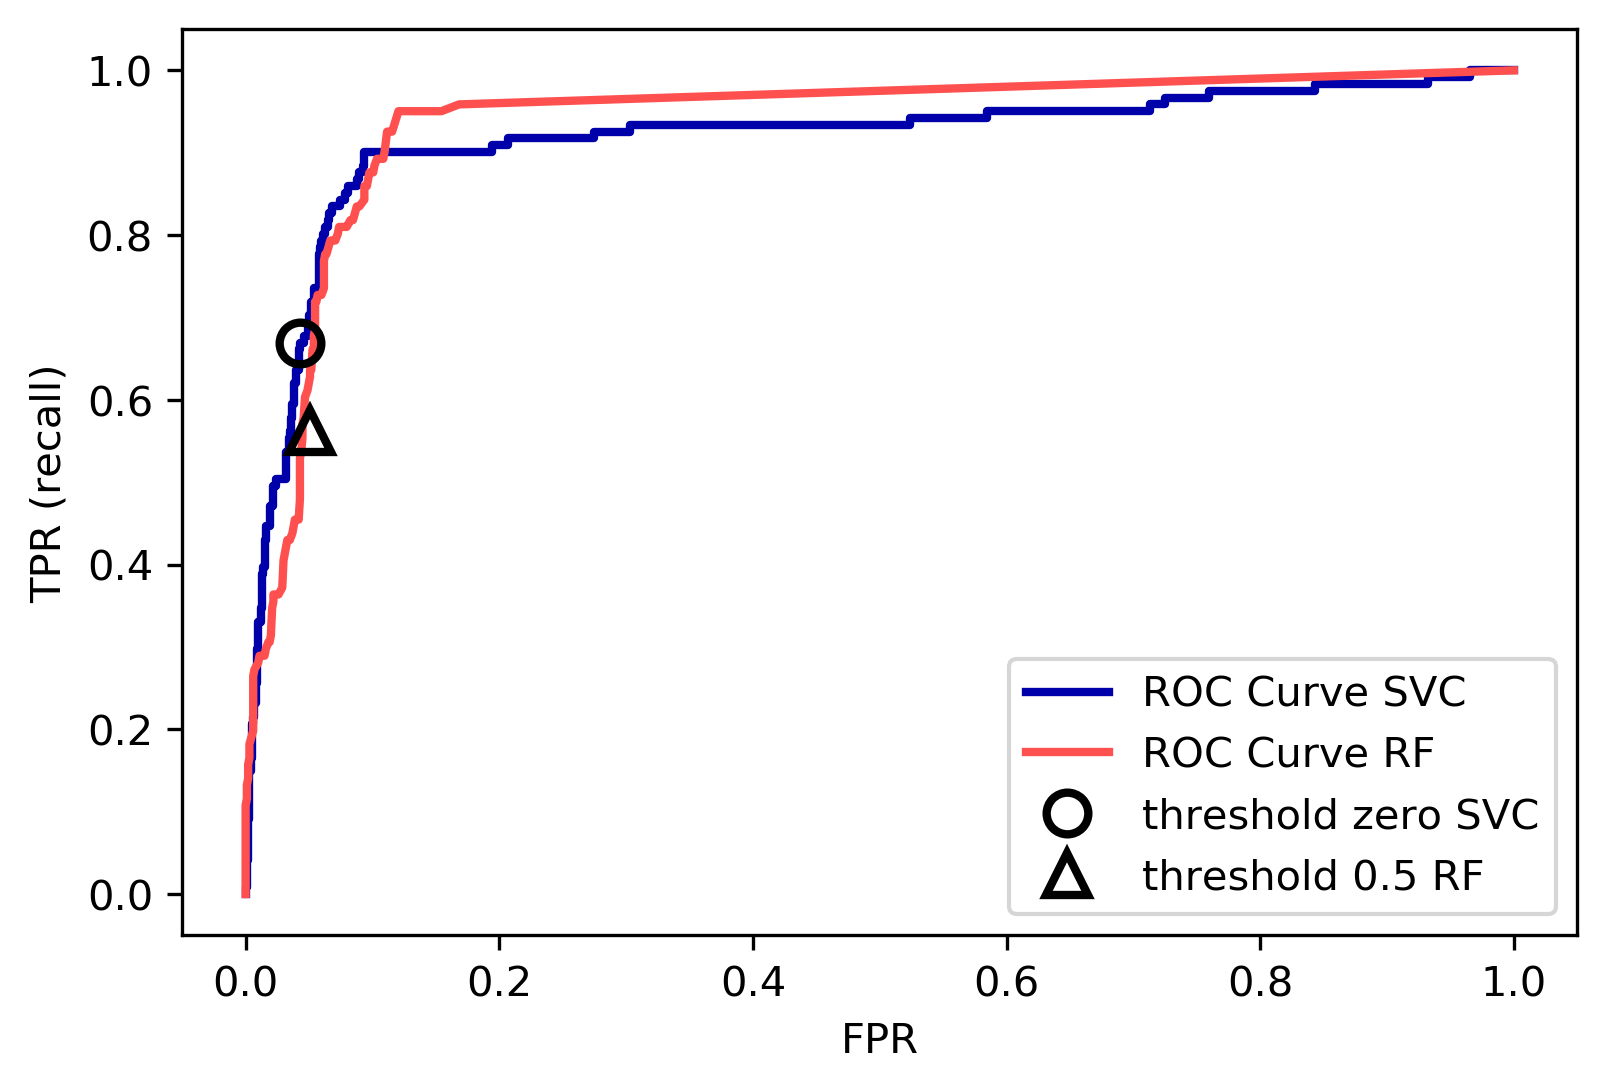

In [72]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [73]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


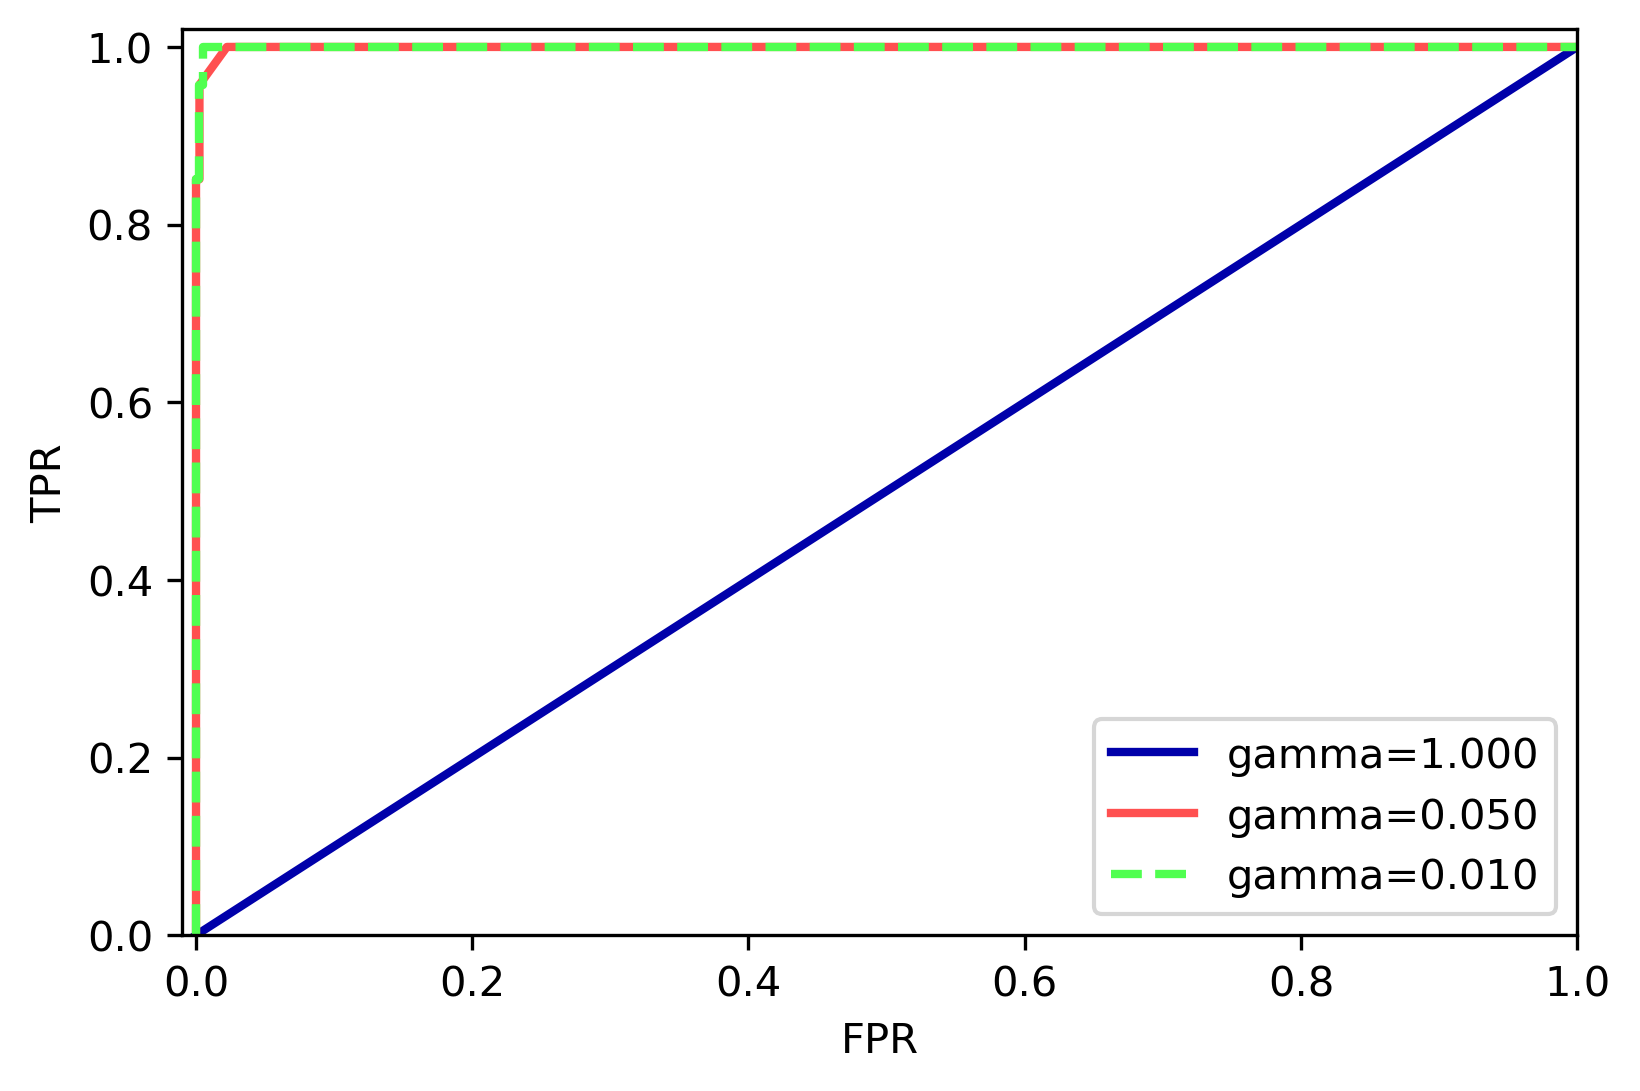

In [74]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [75]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


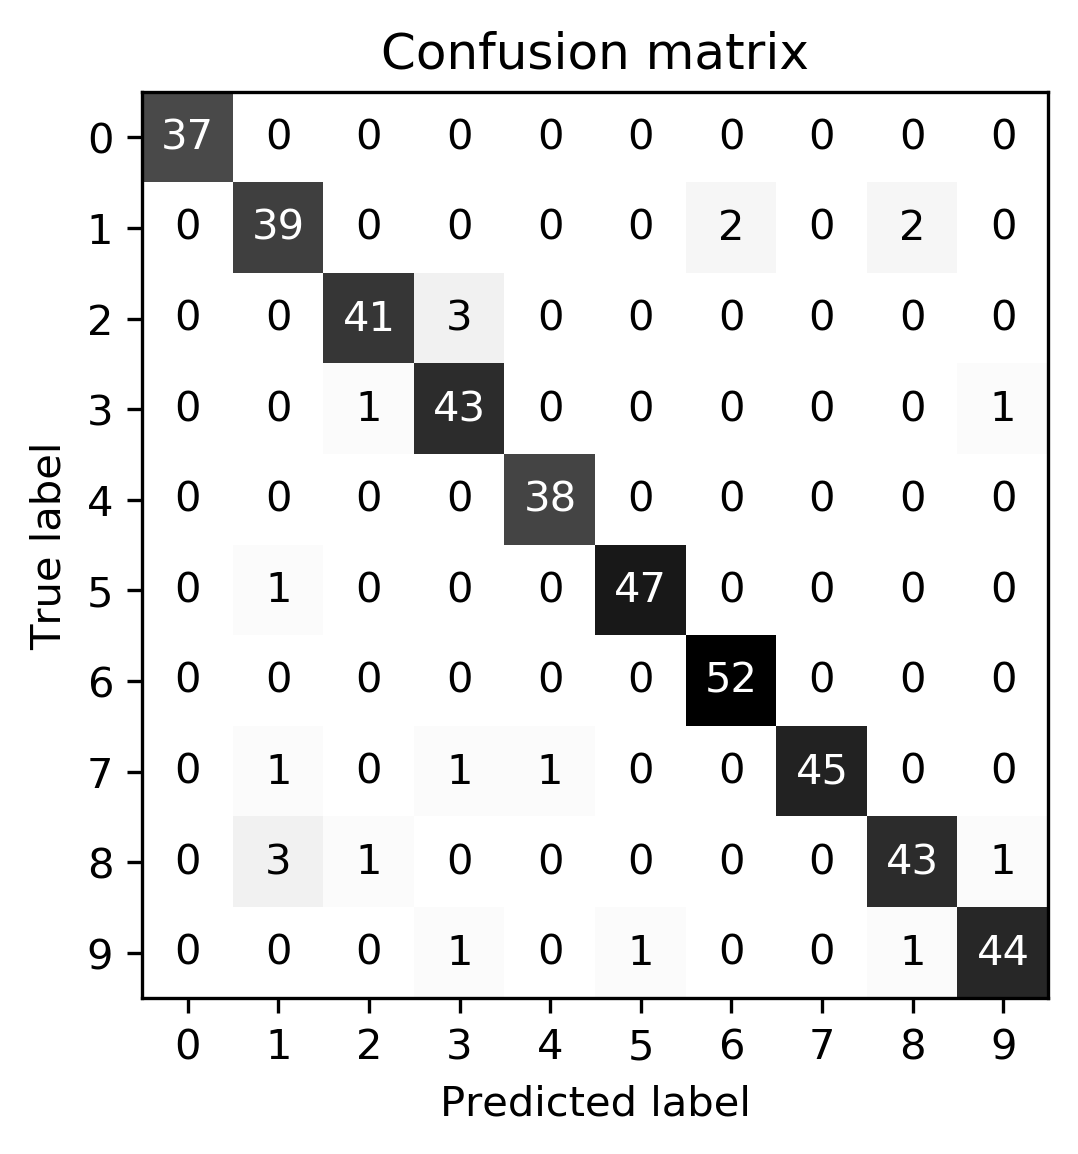

In [76]:
scores_image = heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [78]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [79]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/skle

Default scoring: [0.9 0.9 0.9 0.9 0.9]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/skle

Explicit accuracy scoring: [0.9 0.9 0.9 0.9 0.9]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/skle

AUC scoring: [0.997 0.997 0.996 0.998 0.992]


In [80]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/skle

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.20,0.13,0.9,1.0,1.00,1.0,0.5,1.0
1,0.18,0.13,0.9,1.0,1.00,1.0,0.5,1.0
2,0.21,0.13,0.9,1.0,1.00,1.0,0.5,1.0
3,0.18,0.11,0.9,1.0,1.00,1.0,0.5,1.0
4,0.18,0.13,0.9,1.0,0.99,1.0,0.5,1.0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [82]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [83]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
